In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='fourthHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='fifthHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='sixthHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 2s 10ms/step - loss: 0.8828 - rmse: 0.4928
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8779 - rmse: 0.4900
Epoch 3/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8732 - rmse: 0.4874
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8690 - rmse: 0.4854
Epoch 5/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8646 - rmse: 0.4831
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8603 - rmse: 0.4810
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8560 - rmse: 0.4787
Epoch 8/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8522 - rmse: 0.4771
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8481 - rmse: 0.4751
Epoch 10/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8441 - rmse: 0.4732
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 13ms/step - loss: 0.6515 - rmse: 0.4264
Epoch 86/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6497 - rmse: 0.4264
Epoch 87/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.6475 - rmse: 0.4259
Epoch 88/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6450 - rmse: 0.4250
Epoch 89/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6432 - rmse: 0.4250
Epoch 90/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.6403 - rmse: 0.4236
Epoch 91/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6378 - rmse: 0.4227
Epoch 92/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6365 - rmse: 0.4233
Epoch 93/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6351 - rmse: 0.4237
Epoch 94/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6322 - rmse: 0.4224
Epoch 95/10000
2/2 [==========================

2/2 [==============================] - 0s 12ms/step - loss: 0.4495 - rmse: 0.3279
Epoch 169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4466 - rmse: 0.3256
Epoch 170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4437 - rmse: 0.3231
Epoch 171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4416 - rmse: 0.3218
Epoch 172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4391 - rmse: 0.3198
Epoch 173/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4372 - rmse: 0.3189
Epoch 174/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4343 - rmse: 0.3163
Epoch 175/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4319 - rmse: 0.3146
Epoch 176/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4301 - rmse: 0.3136
Epoch 177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4276 - rmse: 0.3117
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.2788 - rmse: 0.1659
Epoch 252/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2790 - rmse: 0.1692
Epoch 253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2770 - rmse: 0.1659
Epoch 254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2762 - rmse: 0.1662
Epoch 255/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2739 - rmse: 0.1618
Epoch 256/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2719 - rmse: 0.1582
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2705 - rmse: 0.1565
Epoch 258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2688 - rmse: 0.1538
Epoch 259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2691 - rmse: 0.1575
Epoch 260/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2677 - rmse: 0.1558
Epoch 261/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.1931 - rmse: 0.0631
Epoch 335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1918 - rmse: 0.0573
Epoch 336/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1916 - rmse: 0.0611
Epoch 337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1911 - rmse: 0.0619
Epoch 338/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1897 - rmse: 0.0556
Epoch 339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1893 - rmse: 0.0572
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1904 - rmse: 0.0706
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1879 - rmse: 0.0562
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1873 - rmse: 0.0560
Epoch 343/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1864 - rmse: 0.0537
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.1437 - rmse: 0.0245
Epoch 418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1431 - rmse: 0.0229
Epoch 419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1428 - rmse: 0.0260
Epoch 420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1423 - rmse: 0.0242
Epoch 421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1418 - rmse: 0.0244
Epoch 422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1430 - rmse: 0.0482
Epoch 423/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1412 - rmse: 0.0302
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1412 - rmse: 0.0381
Epoch 425/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1399 - rmse: 0.0235
Epoch 426/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1398 - rmse: 0.0317
Epoch 427/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.1089 - rmse: 0.0146
Epoch 501/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1090 - rmse: 0.0252
Epoch 502/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1087 - rmse: 0.0274
Epoch 503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1080 - rmse: 0.0199
Epoch 504/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1075 - rmse: 0.0138
Epoch 505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1076 - rmse: 0.0256
Epoch 506/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1069 - rmse: 0.0189
Epoch 507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1069 - rmse: 0.0254
Epoch 508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1068 - rmse: 0.0314
Epoch 509/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1061 - rmse: 0.0250
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0829 - rmse: 0.0150
Epoch 584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0828 - rmse: 0.0196
Epoch 585/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0824 - rmse: 0.0132
Epoch 586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0827 - rmse: 0.0281
Epoch 587/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0821 - rmse: 0.0204
Epoch 588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0818 - rmse: 0.0196
Epoch 589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0823 - rmse: 0.0338
Epoch 590/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0825 - rmse: 0.0412
Epoch 591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0808 - rmse: 0.0161
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0806 - rmse: 0.0182
Epoch 593/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0653 - rmse: 0.0468
Epoch 667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0641 - rmse: 0.0339
Epoch 668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0637 - rmse: 0.0317
Epoch 669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0632 - rmse: 0.0262
Epoch 670/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0632 - rmse: 0.0299
Epoch 671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0632 - rmse: 0.0323
Epoch 672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0628 - rmse: 0.0292
Epoch 673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0621 - rmse: 0.0191
Epoch 674/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0617 - rmse: 0.0140
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0635 - rmse: 0.0470
Epoch 676/10000
2/2 [================

2/2 [==============================] - 0s 12ms/step - loss: 0.0489 - rmse: 0.0209
Epoch 750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0497 - rmse: 0.0370
Epoch 751/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0491 - rmse: 0.0308
Epoch 752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0484 - rmse: 0.0174
Epoch 753/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0485 - rmse: 0.0247
Epoch 754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0480 - rmse: 0.0145
Epoch 755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0482 - rmse: 0.0251
Epoch 756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0480 - rmse: 0.0229
Epoch 757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0482 - rmse: 0.0301
Epoch 758/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0483 - rmse: 0.0342
Epoch 759/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - rmse: 0.0215
Epoch 833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - rmse: 0.0282
Epoch 834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - rmse: 0.0177
Epoch 835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0396 - rmse: 0.0484
Epoch 836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - rmse: 0.0333
Epoch 837/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0393 - rmse: 0.0480
Epoch 838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - rmse: 0.0380
Epoch 839/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0377 - rmse: 0.0298
Epoch 840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - rmse: 0.0309
Epoch 841/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0367 - rmse: 0.0133
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0309 - rmse: 0.0401
Epoch 916/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0297 - rmse: 0.0233
Epoch 917/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0300 - rmse: 0.0295
Epoch 918/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0296 - rmse: 0.0240
Epoch 919/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0292 - rmse: 0.0152
Epoch 920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0298 - rmse: 0.0306
Epoch 921/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0295 - rmse: 0.0266
Epoch 922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0292 - rmse: 0.0227
Epoch 923/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0292 - rmse: 0.0240
Epoch 924/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0290 - rmse: 0.0228
Epoch 925/10000
2/2 [================

2/2 [==============================] - 0s 12ms/step - loss: 0.0233 - rmse: 0.0179
Epoch 999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0236 - rmse: 0.0258
Epoch 1000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0240 - rmse: 0.0329
Epoch 1001/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0233 - rmse: 0.0227
Epoch 1002/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0231 - rmse: 0.0181
Epoch 1003/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0235 - rmse: 0.0288
Epoch 1004/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0228 - rmse: 0.0115
Epoch 1005/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0228 - rmse: 0.0158
Epoch 1006/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0226 - rmse: 0.0097
Epoch 1007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0226 - rmse: 0.0116
Epoch 1008/10000
2/2 [======

Epoch 1081/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0187 - rmse: 0.0226
Epoch 1082/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0185 - rmse: 0.0177
Epoch 1083/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0189 - rmse: 0.0274
Epoch 1084/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0181 - rmse: 0.0080
Epoch 1085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0184 - rmse: 0.0190
Epoch 1086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0182 - rmse: 0.0169
Epoch 1087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0183 - rmse: 0.0207
Epoch 1088/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0190 - rmse: 0.0332
Epoch 1089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0183 - rmse: 0.0212
Epoch 1090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0182 - rmse: 0.0215
Epoch 1091

2/2 [==============================] - 0s 13ms/step - loss: 0.0146 - rmse: 0.0095
Epoch 1164/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0145 - rmse: 0.0068
Epoch 1165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0153 - rmse: 0.0298
Epoch 1166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0145 - rmse: 0.0090
Epoch 1167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.0087
Epoch 1168/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0151 - rmse: 0.0274
Epoch 1169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.0126
Epoch 1170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0150 - rmse: 0.0271
Epoch 1171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0150 - rmse: 0.0285
Epoch 1172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0147 - rmse: 0.0221
Epoch 1173/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.0191
Epoch 1246/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0125
Epoch 1247/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0119 - rmse: 0.0177
Epoch 1248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.0112
Epoch 1249/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0119 - rmse: 0.0187
Epoch 1250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0116 - rmse: 0.0116
Epoch 1251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0122 - rmse: 0.0271
Epoch 1252/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0115 - rmse: 0.0110
Epoch 1253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.0154
Epoch 1254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0122 - rmse: 0.0290
Epoch 1255/10000
2/2 [=====

Epoch 1328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0298
Epoch 1329/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0094 - rmse: 0.0076
Epoch 1330/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0088
Epoch 1331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0088
Epoch 1332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0281
Epoch 1333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0161
Epoch 1334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0323
Epoch 1335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0261
Epoch 1336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0074
Epoch 1337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0291
Epoch 1338

2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0298
Epoch 1411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0113
Epoch 1412/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0118
Epoch 1413/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0119
Epoch 1414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0219
Epoch 1415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0272
Epoch 1416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0273
Epoch 1417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0318
Epoch 1418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0442
Epoch 1419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0323
Epoch 1420/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0139
Epoch 1493/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0108
Epoch 1494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0418
Epoch 1495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0402
Epoch 1496/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0312
Epoch 1497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0468
Epoch 1498/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0161
Epoch 1499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0108
Epoch 1500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0227
Epoch 1501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0072
Epoch 1502/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0237
Epoch 1575/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0270
Epoch 1576/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0215
Epoch 1577/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0162
Epoch 1578/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0179
Epoch 1579/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0298
Epoch 1580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0182
Epoch 1581/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0177
Epoch 1582/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0263
Epoch 1583/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0305
Epoch 1584/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0181
Epoch 1657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0268
Epoch 1658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0148
Epoch 1659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0155
Epoch 1660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0201
Epoch 1661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0196
Epoch 1662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0154
Epoch 1663/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0253
Epoch 1664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0427
Epoch 1665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0138
Epoch 1666/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0205
Epoch 1739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0211
Epoch 1740/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0190
Epoch 1741/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0223
Epoch 1742/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0167
Epoch 1743/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0112
Epoch 1744/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0075
Epoch 1745/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0259
Epoch 1746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0259
Epoch 1747/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 1748/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0298
Epoch 1821/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0294
Epoch 1822/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0264
Epoch 1823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0259
Epoch 1824/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0330
Epoch 1825/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0284
Epoch 1826/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0082
Epoch 1827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0308
Epoch 1828/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0103
Epoch 1829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0076
Epoch 1830/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0079
Epoch 1903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0100
Epoch 1904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0308
Epoch 1905/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0082
Epoch 1906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0456
Epoch 1907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0248
Epoch 1908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0306
Epoch 1909/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0212
Epoch 1910/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 1911/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0293
Epoch 1912/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0052
Epoch 1985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 1986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0195
Epoch 1987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0225
Epoch 1988/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0393
Epoch 1989/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0064
Epoch 1990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0129
Epoch 1991/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0320
Epoch 1992/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0306
Epoch 1993/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 1994/10000
2/2 [=====

Epoch 2067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0199
Epoch 2068/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0323
Epoch 2069/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0122
Epoch 2070/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0297
Epoch 2071/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0295
Epoch 2072/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0062
Epoch 2073/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0184
Epoch 2074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0215
Epoch 2075/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0455
Epoch 2076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0132
Epoch 2077

2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0171
Epoch 2150/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0148
Epoch 2151/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0137
Epoch 2152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0154
Epoch 2153/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0282
Epoch 2154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0313
Epoch 2155/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0125
Epoch 2156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0297
Epoch 2157/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0293
Epoch 2158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0314
Epoch 2159/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0181
Epoch 2232/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0246
Epoch 2233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0129
Epoch 2234/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0191
Epoch 2235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0294
Epoch 2236/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0298
Epoch 2237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0309
Epoch 2238/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0296
Epoch 2239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0410
Epoch 2240/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0201
Epoch 2241/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 7.9590e-04 - rmse: 0.0086
Epoch 2314/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0396
Epoch 2315/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0252
Epoch 2316/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0186
Epoch 2317/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6852e-04 - rmse: 0.0073
Epoch 2318/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0244
Epoch 2319/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0213
Epoch 2320/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0394
Epoch 2321/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0215
Epoch 2322/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.2417e-04 - rmse: 0.0109
Epoch 2323/1000

2/2 [==============================] - 0s 11ms/step - loss: 6.5852e-04 - rmse: 0.0086
Epoch 2395/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.0289e-04 - rmse: 0.0043
Epoch 2396/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0243
Epoch 2397/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0423
Epoch 2398/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8938e-04 - rmse: 0.0146
Epoch 2399/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1464e-04 - rmse: 0.0061
Epoch 2400/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0223
Epoch 2401/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.3909e-04 - rmse: 0.0191
Epoch 2402/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0295
Epoch 2403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0324
Epoch 2

2/2 [==============================] - 0s 10ms/step - loss: 6.8164e-04 - rmse: 0.0144
Epoch 2476/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1980e-04 - rmse: 0.0211
Epoch 2477/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0238
Epoch 2478/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3929e-04 - rmse: 0.0164
Epoch 2479/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8917e-04 - rmse: 0.0205
Epoch 2480/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.5266e-04 - rmse: 0.0220
Epoch 2481/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6056e-04 - rmse: 0.0198
Epoch 2482/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0279
Epoch 2483/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.3364e-04 - rmse: 0.0192
Epoch 2484/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9762e-04 - rmse: 0.

2/2 [==============================] - 0s 12ms/step - loss: 4.6136e-04 - rmse: 0.0087
Epoch 2556/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0282
Epoch 2557/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2466e-04 - rmse: 0.0210
Epoch 2558/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1387e-04 - rmse: 0.0055
Epoch 2559/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2531e-04 - rmse: 0.0156
Epoch 2560/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0169e-04 - rmse: 0.0045
Epoch 2561/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0319
Epoch 2562/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8725e-04 - rmse: 0.0202
Epoch 2563/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0422
Epoch 2564/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6751e-04 - rmse: 0.0095

2/2 [==============================] - 0s 12ms/step - loss: 3.5390e-04 - rmse: 0.0063
Epoch 2636/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0370
Epoch 2637/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3279e-04 - rmse: 0.0110
Epoch 2638/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5610e-04 - rmse: 0.0185
Epoch 2639/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 2640/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2770e-04 - rmse: 0.0108
Epoch 2641/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8834e-04 - rmse: 0.0133
Epoch 2642/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2688e-04 - rmse: 0.0178
Epoch 2643/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3518e-04 - rmse: 0.0181
Epoch 2644/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4660e-04 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 2716/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0435
Epoch 2717/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 2718/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0019e-04 - rmse: 0.0121
Epoch 2719/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2720/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0301
Epoch 2721/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4644e-04 - rmse: 0.0244
Epoch 2722/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7889e-04 - rmse: 0.0113
Epoch 2723/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 2724/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6909e-04 - rmse: 0.0227
Epoch 2725/

2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 2796/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3405e-04 - rmse: 0.0049
Epoch 2797/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3997e-04 - rmse: 0.0055
Epoch 2798/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0400
Epoch 2799/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0282
Epoch 2800/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0287
Epoch 2801/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2417e-04 - rmse: 0.0108
Epoch 2802/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 2803/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0427
Epoch 2804/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 2805/10000

2/2 [==============================] - 0s 12ms/step - loss: 2.4811e-04 - rmse: 0.0085
Epoch 2876/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4306e-04 - rmse: 0.0258
Epoch 2877/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.6607e-04 - rmse: 0.0198
Epoch 2878/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 2879/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3913e-04 - rmse: 0.0082
Epoch 2880/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9355e-04 - rmse: 0.0179
Epoch 2881/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9996e-04 - rmse: 0.0052
Epoch 2882/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 2883/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0895e-04 - rmse: 0.0062
Epoch 2884/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0292

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0416
Epoch 2956/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8574e-04 - rmse: 0.0185
Epoch 2957/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.3574e-04 - rmse: 0.0198
Epoch 2958/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5265e-04 - rmse: 0.0225
Epoch 2959/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4898e-04 - rmse: 0.0265
Epoch 2960/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 2961/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2772e-04 - rmse: 0.0169
Epoch 2962/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7931e-04 - rmse: 0.0232
Epoch 2963/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0337
Epoch 2964/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0326
Epoc

2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 3036/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1890e-04 - rmse: 0.0140
Epoch 3037/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.1689e-04 - rmse: 0.0139
Epoch 3038/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1001e-04 - rmse: 0.0197
Epoch 3039/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3908e-04 - rmse: 0.0227
Epoch 3040/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3082e-04 - rmse: 0.0104
Epoch 3041/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4983e-04 - rmse: 0.0113
Epoch 3042/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5723e-04 - rmse: 0.0116
Epoch 3043/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.2065e-04 - rmse: 0.0200
Epoch 3044/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 4.8394e-04 - rmse: 0.0194
Epoch 3116/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1817e-04 - rmse: 0.0106
Epoch 3117/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 3118/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0439e-04 - rmse: 0.0283
Epoch 3119/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5517e-04 - rmse: 0.0072
Epoch 3120/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 3121/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7381e-04 - rmse: 0.0259
Epoch 3122/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.2825e-04 - rmse: 0.0112
Epoch 3123/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1975e-04 - rmse: 0.0108
Epoch 3124/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3479e-04 - rmse: 0.

2/2 [==============================] - 0s 12ms/step - loss: 1.5895e-04 - rmse: 0.0082
Epoch 3196/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1145e-04 - rmse: 0.0179
Epoch 3197/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6234e-04 - rmse: 0.0084
Epoch 3198/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0696e-04 - rmse: 0.0039
Epoch 3199/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6233e-04 - rmse: 0.0239
Epoch 3200/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4192e-04 - rmse: 0.0072
Epoch 3201/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9189e-04 - rmse: 0.0265
Epoch 3202/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.9859e-04 - rmse: 0.0202
Epoch 3203/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2265e-04 - rmse: 0.0152
Epoch 3204/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 3276/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5927e-04 - rmse: 0.0195
Epoch 3277/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 3278/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8925e-04 - rmse: 0.0284
Epoch 3279/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 3280/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 3281/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1093e-04 - rmse: 0.0208
Epoch 3282/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0396
Epoch 3283/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7093e-04 - rmse: 0.0263
Epoch 3284/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2049e-04 - rmse: 0.0118
Epoch 3

2/2 [==============================] - 0s 12ms/step - loss: 9.8447e-04 - rmse: 0.0302
Epoch 3356/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6084e-04 - rmse: 0.0298
Epoch 3357/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8014e-04 - rmse: 0.0284
Epoch 3358/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1305e-04 - rmse: 0.0253
Epoch 3359/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 3360/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5068e-04 - rmse: 0.0089
Epoch 3361/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4567e-04 - rmse: 0.0132
Epoch 3362/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4328e-04 - rmse: 0.0131
Epoch 3363/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 3364/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0391

2/2 [==============================] - 0s 11ms/step - loss: 2.3560e-04 - rmse: 0.0130
Epoch 3436/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2896e-04 - rmse: 0.0294
Epoch 3437/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 3438/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2751e-04 - rmse: 0.0237
Epoch 3439/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 3440/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0436e-04 - rmse: 0.0253
Epoch 3441/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3197e-04 - rmse: 0.0081
Epoch 3442/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6948e-04 - rmse: 0.0102
Epoch 3443/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7503e-04 - rmse: 0.0247
Epoch 3444/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7026e-04 - rmse: 0.

2/2 [==============================] - 0s 12ms/step - loss: 4.3285e-04 - rmse: 0.0193
Epoch 3516/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 3517/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9879e-04 - rmse: 0.0118
Epoch 3518/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 3519/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7401e-04 - rmse: 0.0107
Epoch 3520/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1606e-04 - rmse: 0.0213
Epoch 3521/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3970e-04 - rmse: 0.0241
Epoch 3522/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 3523/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6391e-04 - rmse: 0.0201
Epoch 3524/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3026e-04 - rmse: 0.0192

2/2 [==============================] - 0s 12ms/step - loss: 6.9488e-04 - rmse: 0.0252
Epoch 3596/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0673e-04 - rmse: 0.0158
Epoch 3597/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1376e-04 - rmse: 0.0074
Epoch 3598/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8072e-04 - rmse: 0.0304
Epoch 3599/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1072e-04 - rmse: 0.0213
Epoch 3600/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4888e-04 - rmse: 0.0198
Epoch 3601/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7488e-04 - rmse: 0.0178
Epoch 3602/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6013e-04 - rmse: 0.0101
Epoch 3603/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8664e-04 - rmse: 0.0181
Epoch 3604/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1100e-04 - 

2/2 [==============================] - 0s 12ms/step - loss: 7.0393e-04 - rmse: 0.0255
Epoch 3676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3677/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0431e-04 - rmse: 0.0212
Epoch 3678/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6550e-04 - rmse: 0.0176
Epoch 3679/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5994e-04 - rmse: 0.0102
Epoch 3680/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4191e-04 - rmse: 0.0093
Epoch 3681/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.1876e-04 - rmse: 0.0215
Epoch 3682/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0557e-04 - rmse: 0.0212
Epoch 3683/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.2533e-04 - rmse: 0.0239
Epoch 3684/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3751e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 3756/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9125e-04 - rmse: 0.0290
Epoch 3757/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1178e-04 - rmse: 0.0257
Epoch 3758/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.6284e-04 - rmse: 0.0285
Epoch 3759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 3760/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1667e-04 - rmse: 0.0163
Epoch 3761/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0862e-04 - rmse: 0.0075
Epoch 3762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 3763/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3271e-04 - rmse: 0.0241
Epoch 3764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epo

2/2 [==============================] - 0s 10ms/step - loss: 4.5984e-04 - rmse: 0.0202
Epoch 3836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 3837/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2151e-04 - rmse: 0.0239
Epoch 3838/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0192e-04 - rmse: 0.0072
Epoch 3839/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0223e-04 - rmse: 0.0212
Epoch 3840/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3945e-04 - rmse: 0.0262
Epoch 3841/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4902e-04 - rmse: 0.0283
Epoch 3842/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2496e-04 - rmse: 0.0194
Epoch 3843/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.1377e-04 - rmse: 0.0258
Epoch 3844/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3110e-04 - rmse

2/2 [==============================] - 0s 13ms/step - loss: 3.1546e-04 - rmse: 0.0163
Epoch 3916/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9900e-04 - rmse: 0.0158
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2486e-04 - rmse: 0.0166
Epoch 3918/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5305e-04 - rmse: 0.0224
Epoch 3919/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3889e-04 - rmse: 0.0197
Epoch 3920/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1518e-04 - rmse: 0.0258
Epoch 3921/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 3922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 3923/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0719e-04 - rmse: 0.0161
Epoch 3924/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7763e-04 - rmse: 0.

2/2 [==============================] - 0s 10ms/step - loss: 2.2723e-04 - rmse: 0.0134
Epoch 3996/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3382e-04 - rmse: 0.0262
Epoch 3997/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6804e-04 - rmse: 0.0205
Epoch 3998/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1418e-04 - rmse: 0.0081
Epoch 3999/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.3226e-04 - rmse: 0.0220
Epoch 4000/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.6295e-04 - rmse: 0.0204
Epoch 4001/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.7244e-04 - rmse: 0.0287
Epoch 4002/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1431e-04 - rmse: 0.0192
Epoch 4003/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5793e-04 - rmse: 0.0176
Epoch 4004/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.8584e-04 - 

2/2 [==============================] - 0s 10ms/step - loss: 6.0883e-04 - rmse: 0.0237
Epoch 4076/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7691e-05 - rmse: 0.0046
Epoch 4077/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6224e-04 - rmse: 0.0147
Epoch 4078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 4079/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4392e-05 - rmse: 0.0043
Epoch 4080/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.2129e-04 - rmse: 0.0240
Epoch 4081/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 4082/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2286e-04 - rmse: 0.0260
Epoch 4083/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1121e-04 - rmse: 0.0081
Epoch 4084/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1881e-04 - rmse: 0.

2/2 [==============================] - 0s 10ms/step - loss: 9.5886e-04 - rmse: 0.0302
Epoch 4156/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.4923e-04 - rmse: 0.0225
Epoch 4157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 4158/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4359e-04 - rmse: 0.0099
Epoch 4159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 4160/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1483e-04 - rmse: 0.0130
Epoch 4161/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5801e-04 - rmse: 0.0146
Epoch 4162/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.3987e-04 - rmse: 0.0244
Epoch 4163/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.2306e-04 - rmse: 0.0133
Epoch 4164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 4236/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5784e-04 - rmse: 0.0248
Epoch 4237/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 4238/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9280e-04 - rmse: 0.0187
Epoch 4239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 4240/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6075e-04 - rmse: 0.0178
Epoch 4241/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.7297e-04 - rmse: 0.0305
Epoch 4242/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2802e-05 - rmse: 0.0069
Epoch 4243/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3539e-05 - rmse: 0.0043
Epoch 4244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0310
Epo

2/2 [==============================] - 0s 11ms/step - loss: 7.1639e-05 - rmse: 0.0051
Epoch 4316/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1951e-05 - rmse: 0.0069
Epoch 4317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 4318/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4240e-04 - rmse: 0.0099
Epoch 4319/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2990e-04 - rmse: 0.0093
Epoch 4320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 4321/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4901e-04 - rmse: 0.0246
Epoch 4322/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.9156e-05 - rmse: 0.0074
Epoch 4323/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9481e-05 - rmse: 0.0067
Epoch 4324/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.8678e-04 - rmse: 0.

2/2 [==============================] - 0s 10ms/step - loss: 8.1726e-04 - rmse: 0.0278
Epoch 4396/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.0650e-04 - rmse: 0.0162
Epoch 4397/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1410e-05 - rmse: 0.0069
Epoch 4398/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2251e-04 - rmse: 0.0195
Epoch 4399/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2655e-04 - rmse: 0.0196
Epoch 4400/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 4401/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1031e-04 - rmse: 0.0082
Epoch 4402/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3690e-05 - rmse: 0.0064
Epoch 4403/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4524e-04 - rmse: 0.0283
Epoch 4404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.

2/2 [==============================] - 0s 12ms/step - loss: 7.7354e-04 - rmse: 0.0270
Epoch 4476/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6602e-04 - rmse: 0.0111
Epoch 4477/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4751e-05 - rmse: 0.0072
Epoch 4478/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7363e-04 - rmse: 0.0114
Epoch 4479/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2772e-04 - rmse: 0.0262
Epoch 4480/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2159e-04 - rmse: 0.0167
Epoch 4481/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5607e-04 - rmse: 0.0146
Epoch 4482/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4270e-04 - rmse: 0.0173
Epoch 4483/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.8196e-04 - rmse: 0.0272
Epoch 4484/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.8796e-04 - 

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 4556/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3587e-04 - rmse: 0.0282
Epoch 4557/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1180e-04 - rmse: 0.0192
Epoch 4558/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 4559/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5314e-04 - rmse: 0.0145
Epoch 4560/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6180e-04 - rmse: 0.0228
Epoch 4561/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9503e-04 - rmse: 0.0213
Epoch 4562/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.0911e-04 - rmse: 0.0216
Epoch 4563/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 4564/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2430e-04 - rmse: 0.0219

2/2 [==============================] - 0s 11ms/step - loss: 5.3993e-04 - rmse: 0.0223
Epoch 4636/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.1142e-04 - rmse: 0.0295
Epoch 4637/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.4492e-04 - rmse: 0.0265
Epoch 4638/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 4639/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4101e-04 - rmse: 0.0200
Epoch 4640/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 4641/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 4642/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9691e-04 - rmse: 0.0125
Epoch 4643/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8780e-04 - rmse: 0.0186
Epoch 4644/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7863e-04 - rmse: 0.0183

2/2 [==============================] - 0s 11ms/step - loss: 5.6000e-04 - rmse: 0.0228
Epoch 4716/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7808e-04 - rmse: 0.0209
Epoch 4717/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7016e-04 - rmse: 0.0288
Epoch 4718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4719/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 4720/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 4721/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6615e-04 - rmse: 0.0180
Epoch 4722/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0632e-04 - rmse: 0.0191
Epoch 4723/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.9031e-04 - rmse: 0.0254
Epoch 4724/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0013 - rmse: 0.0358
Epo

2/2 [==============================] - 0s 11ms/step - loss: 2.0824e-04 - rmse: 0.0130
Epoch 4796/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4673e-05 - rmse: 0.0067
Epoch 4797/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7593e-05 - rmse: 0.0051
Epoch 4798/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.3050e-04 - rmse: 0.0221
Epoch 4799/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6451e-04 - rmse: 0.0149
Epoch 4800/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8546e-04 - rmse: 0.0186
Epoch 4801/10000
2/2 [==============================] - 0s 17ms/step - loss: 1.2779e-04 - rmse: 0.0093
Epoch 4802/10000
2/2 [==============================] - 0s 17ms/step - loss: 7.9482e-05 - rmse: 0.0062
Epoch 4803/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 4804/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.8077e-04 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 6.0726e-04 - rmse: 0.0238
Epoch 4876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 4877/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3451e-04 - rmse: 0.0264
Epoch 4878/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 4879/10000
2/2 [==============================] - 0s 17ms/step - loss: 6.3905e-04 - rmse: 0.0245
Epoch 4880/10000
2/2 [==============================] - 0s 17ms/step - loss: 7.0581e-04 - rmse: 0.0258
Epoch 4881/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.2491e-04 - rmse: 0.0168
Epoch 4882/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 4883/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.3768e-04 - rmse: 0.0300
Epoch 4884/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0864e-04 - rmse: 0.0277

2/2 [==============================] - 0s 12ms/step - loss: 1.2047e-04 - rmse: 0.0089
Epoch 4956/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4977e-04 - rmse: 0.0226
Epoch 4957/10000
2/2 [==============================] - 0s 16ms/step - loss: 6.0870e-04 - rmse: 0.0238
Epoch 4958/10000
2/2 [==============================] - 0s 17ms/step - loss: 4.3457e-04 - rmse: 0.0198
Epoch 4959/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 4960/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7076e-04 - rmse: 0.0182
Epoch 4961/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.6619e-04 - rmse: 0.0181
Epoch 4962/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5316e-04 - rmse: 0.0267
Epoch 4963/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9208e-04 - rmse: 0.0212
Epoch 4964/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.

2/2 [==============================] - 0s 23ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 5036/10000
2/2 [==============================] - 0s 15ms/step - loss: 7.5698e-04 - rmse: 0.0268
Epoch 5037/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.8697e-04 - rmse: 0.0157
Epoch 5038/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 5039/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.9999e-04 - rmse: 0.0126
Epoch 5040/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0313e-04 - rmse: 0.0128
Epoch 5041/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5790e-04 - rmse: 0.0108
Epoch 5042/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8021e-04 - rmse: 0.0184
Epoch 5043/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 5044/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2874e-04 - rmse: 0.0298

2/2 [==============================] - 0s 20ms/step - loss: 6.1301e-05 - rmse: 0.0047
Epoch 5116/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.1411e-04 - rmse: 0.0132
Epoch 5117/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 5118/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4532e-04 - rmse: 0.0201
Epoch 5119/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1625e-04 - rmse: 0.0194
Epoch 5120/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4477e-04 - rmse: 0.0201
Epoch 5121/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.6898e-04 - rmse: 0.0251
Epoch 5122/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7421e-04 - rmse: 0.0153
Epoch 5123/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1531e-04 - rmse: 0.0087
Epoch 5124/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1386e-04 - rmse

2/2 [==============================] - 0s 13ms/step - loss: 7.8143e-04 - rmse: 0.0272
Epoch 5196/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0634e-04 - rmse: 0.0163
Epoch 5197/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7954e-04 - rmse: 0.0307
Epoch 5198/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9944e-04 - rmse: 0.0257
Epoch 5199/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6905e-04 - rmse: 0.0182
Epoch 5200/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 5201/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3966e-05 - rmse: 0.0050
Epoch 5202/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1906e-04 - rmse: 0.0167
Epoch 5203/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 5204/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1264e-04 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5276/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6190e-05 - rmse: 0.0069
Epoch 5277/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 5278/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1214e-04 - rmse: 0.0085
Epoch 5279/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7678e-04 - rmse: 0.0209
Epoch 5280/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4218e-05 - rmse: 0.0022
Epoch 5281/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.7861e-04 - rmse: 0.0306
Epoch 5282/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 5283/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9613e-04 - rmse: 0.0126
Epoch 5284/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5023e-04 - rmse: 0.0106

2/2 [==============================] - 0s 11ms/step - loss: 5.8115e-05 - rmse: 0.0044
Epoch 5356/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 5357/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8576e-04 - rmse: 0.0291
Epoch 5358/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 5359/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2919e-04 - rmse: 0.0096
Epoch 5360/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4111e-04 - rmse: 0.0201
Epoch 5361/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7734e-05 - rmse: 0.0043
Epoch 5362/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 5363/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0626e-04 - rmse: 0.0258
Epoch 5364/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0395
Epo

2/2 [==============================] - 0s 13ms/step - loss: 1.7997e-04 - rmse: 0.0119
Epoch 5436/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6906e-04 - rmse: 0.0230
Epoch 5437/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 5438/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3008e-04 - rmse: 0.0171
Epoch 5439/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4910e-04 - rmse: 0.0145
Epoch 5440/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 5441/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5442/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 5443/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7570e-04 - rmse: 0.0253
Epoch 5444/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3507e-04 - rmse: 0.0264
Epo

Epoch 5516/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1623e-04 - rmse: 0.0133
Epoch 5517/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 5518/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8366e-04 - rmse: 0.0121
Epoch 5519/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3996e-04 - rmse: 0.0265
Epoch 5520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 5521/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1321e-04 - rmse: 0.0278
Epoch 5522/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.9114e-04 - rmse: 0.0292
Epoch 5523/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3878e-04 - rmse: 0.0224
Epoch 5524/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 5525/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 -

2/2 [==============================] - 0s 11ms/step - loss: 2.9684e-04 - rmse: 0.0161
Epoch 5597/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 5598/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6205e-04 - rmse: 0.0206
Epoch 5599/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6067e-05 - rmse: 0.0076
Epoch 5600/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.5432e-04 - rmse: 0.0286
Epoch 5601/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6472e-04 - rmse: 0.0287
Epoch 5602/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8271e-04 - rmse: 0.0120
Epoch 5603/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.6565e-04 - rmse: 0.0270
Epoch 5604/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6217e-04 - rmse: 0.0206
Epoch 5605/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6702e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 7.3957e-04 - rmse: 0.0265
Epoch 5677/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5875e-04 - rmse: 0.0110
Epoch 5678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 5679/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7750e-04 - rmse: 0.0272
Epoch 5680/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4370e-04 - rmse: 0.0144
Epoch 5681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 5682/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 5683/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.6335e-04 - rmse: 0.0287
Epoch 5684/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7153e-04 - rmse: 0.0271
Epoch 5685/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9168e-04 - rmse: 0.0275

2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 5757/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3088e-04 - rmse: 0.0282
Epoch 5758/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9310e-04 - rmse: 0.0125
Epoch 5759/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8924e-04 - rmse: 0.0123
Epoch 5760/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0161e-04 - rmse: 0.0162
Epoch 5761/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3638e-04 - rmse: 0.0245
Epoch 5762/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2605e-04 - rmse: 0.0281
Epoch 5763/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.9294e-04 - rmse: 0.0292
Epoch 5764/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2139e-04 - rmse: 0.0196
Epoch 5765/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3092e-04 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 6.7306e-04 - rmse: 0.0252
Epoch 5837/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8139e-04 - rmse: 0.0290
Epoch 5838/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2572e-05 - rmse: 0.0067
Epoch 5839/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5664e-04 - rmse: 0.0148
Epoch 5840/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1412e-04 - rmse: 0.0087
Epoch 5841/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1859e-04 - rmse: 0.0134
Epoch 5842/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2049e-05 - rmse: 0.0037
Epoch 5843/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4751e-04 - rmse: 0.0226
Epoch 5844/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8720e-04 - rmse: 0.0158
Epoch 5845/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8651e-04 - 

2/2 [==============================] - 0s 11ms/step - loss: 4.4094e-05 - rmse: 0.0024
Epoch 5917/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5243e-04 - rmse: 0.0177
Epoch 5918/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4754e-05 - rmse: 0.0027
Epoch 5919/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3512e-05 - rmse: 0.0068
Epoch 5920/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 5921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 5922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 5923/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4227e-04 - rmse: 0.0103
Epoch 5924/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4031e-04 - rmse: 0.0142
Epoch 5925/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5855e-04 - rmse: 0.0148

2/2 [==============================] - 0s 11ms/step - loss: 8.3281e-04 - rmse: 0.0282
Epoch 5997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 5998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 5999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 6000/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3134e-04 - rmse: 0.0139
Epoch 6001/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5226e-04 - rmse: 0.0107
Epoch 6002/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4627e-04 - rmse: 0.0104
Epoch 6003/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.4250e-04 - rmse: 0.0301
Epoch 6004/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1062e-04 - rmse: 0.0218
Epoch 6005/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8071e-04 - rmse: 0.0254

2/2 [==============================] - 0s 10ms/step - loss: 1.2243e-04 - rmse: 0.0092
Epoch 6077/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 6078/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.7306e-04 - rmse: 0.0289
Epoch 6079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 6080/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9281e-04 - rmse: 0.0188
Epoch 6081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 6082/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5888e-04 - rmse: 0.0268
Epoch 6083/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4469e-05 - rmse: 0.0075
Epoch 6084/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4127e-05 - rmse: 0.0068
Epoch 6085/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1074e-04 - rmse: 0.0131

2/2 [==============================] - 0s 13ms/step - loss: 2.5368e-04 - rmse: 0.0147
Epoch 6157/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 6158/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.7879e-04 - rmse: 0.0233
Epoch 6159/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2253e-04 - rmse: 0.0220
Epoch 6160/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3549e-04 - rmse: 0.0141
Epoch 6161/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7338e-04 - rmse: 0.0271
Epoch 6162/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7802e-04 - rmse: 0.0185
Epoch 6163/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9777e-04 - rmse: 0.0127
Epoch 6164/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 6165/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.2929e-04 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 9.5858e-04 - rmse: 0.0304
Epoch 6237/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8262e-05 - rmse: 0.0046
Epoch 6238/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1426e-04 - rmse: 0.0194
Epoch 6239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 6240/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4412e-05 - rmse: 0.0069
Epoch 6241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 6242/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4456e-04 - rmse: 0.0202
Epoch 6243/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2010e-05 - rmse: 0.0021
Epoch 6244/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.8019e-04 - rmse: 0.0185
Epoch 6245/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.1153e-04 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 3.3200e-04 - rmse: 0.0172
Epoch 6317/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2991e-04 - rmse: 0.0198
Epoch 6318/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0983e-05 - rmse: 0.0037
Epoch 6319/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1542e-04 - rmse: 0.0088
Epoch 6320/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8661e-05 - rmse: 0.0046
Epoch 6321/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5740e-04 - rmse: 0.0303
Epoch 6322/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5226e-04 - rmse: 0.0302
Epoch 6323/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5891e-04 - rmse: 0.0179
Epoch 6324/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1949e-04 - rmse: 0.0196
Epoch 6325/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4996e-04 - 

2/2 [==============================] - 0s 12ms/step - loss: 8.2004e-04 - rmse: 0.0280
Epoch 6397/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1936e-04 - rmse: 0.0280
Epoch 6398/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2312e-04 - rmse: 0.0169
Epoch 6399/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3744e-04 - rmse: 0.0265
Epoch 6400/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6148e-04 - rmse: 0.0180
Epoch 6401/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5149e-04 - rmse: 0.0267
Epoch 6402/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4925e-04 - rmse: 0.0267
Epoch 6403/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9169e-04 - rmse: 0.0188
Epoch 6404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 6405/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4289e-04 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 8.1887e-05 - rmse: 0.0067
Epoch 6477/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8422e-05 - rmse: 0.0046
Epoch 6478/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7127e-04 - rmse: 0.0183
Epoch 6479/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9044e-04 - rmse: 0.0292
Epoch 6480/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6850e-04 - rmse: 0.0305
Epoch 6481/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2471e-04 - rmse: 0.0281
Epoch 6482/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4631e-04 - rmse: 0.0202
Epoch 6483/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0502e-04 - rmse: 0.0238
Epoch 6484/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0962e-04 - rmse: 0.0165
Epoch 6485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 1.2629e-04 - rmse: 0.0095
Epoch 6557/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0517e-04 - rmse: 0.0083
Epoch 6558/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4376e-04 - rmse: 0.0103
Epoch 6559/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1033e-04 - rmse: 0.0165
Epoch 6560/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 6561/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5758e-04 - rmse: 0.0149
Epoch 6562/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1167e-04 - rmse: 0.0194
Epoch 6563/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6652e-05 - rmse: 0.0077
Epoch 6564/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7467e-04 - rmse: 0.0117
Epoch 6565/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5996e-05 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 8.4187e-04 - rmse: 0.0284
Epoch 6637/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 6638/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9521e-04 - rmse: 0.0309
Epoch 6639/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2231e-04 - rmse: 0.0298
Epoch 6640/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4676e-04 - rmse: 0.0105
Epoch 6641/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8297e-04 - rmse: 0.0121
Epoch 6642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 6643/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9488e-04 - rmse: 0.0189
Epoch 6644/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7529e-04 - rmse: 0.0290
Epoch 6645/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0441

2/2 [==============================] - 0s 11ms/step - loss: 1.0673e-04 - rmse: 0.0083
Epoch 6717/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4081e-04 - rmse: 0.0102
Epoch 6718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 6719/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.8730e-04 - rmse: 0.0255
Epoch 6720/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 6721/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5303e-04 - rmse: 0.0178
Epoch 6722/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0750e-04 - rmse: 0.0084
Epoch 6723/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 6724/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.1130e-05 - rmse: 0.0074
Epoch 6725/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4369e-04 - rmse: 0.0202

2/2 [==============================] - 0s 12ms/step - loss: 5.4963e-04 - rmse: 0.0227
Epoch 6797/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7270e-04 - rmse: 0.0252
Epoch 6798/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0968e-04 - rmse: 0.0132
Epoch 6799/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8279e-04 - rmse: 0.0254
Epoch 6800/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 6801/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1159e-04 - rmse: 0.0194
Epoch 6802/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0005e-04 - rmse: 0.0294
Epoch 6803/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2165e-04 - rmse: 0.0280
Epoch 6804/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9318e-04 - rmse: 0.0293
Epoch 6805/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0040e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 6877/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5357e-04 - rmse: 0.0228
Epoch 6878/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7810e-04 - rmse: 0.0210
Epoch 6879/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6811e-04 - rmse: 0.0305
Epoch 6880/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2779e-04 - rmse: 0.0243
Epoch 6881/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2225e-04 - rmse: 0.0092
Epoch 6882/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1366e-04 - rmse: 0.0194
Epoch 6883/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6923e-04 - rmse: 0.0183
Epoch 6884/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7814e-04 - rmse: 0.0210
Epoch 6885/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4884e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 9.0280e-04 - rmse: 0.0294
Epoch 6957/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9035e-04 - rmse: 0.0256
Epoch 6958/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 6959/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.7714e-04 - rmse: 0.0272
Epoch 6960/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1521e-04 - rmse: 0.0089
Epoch 6961/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5931e-04 - rmse: 0.0229
Epoch 6962/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0942e-04 - rmse: 0.0165
Epoch 6963/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.6311e-04 - rmse: 0.0269
Epoch 6964/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.1910e-04 - rmse: 0.0241
Epoch 6965/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4385e-05 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 1.0893e-04 - rmse: 0.0085
Epoch 7037/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2946e-04 - rmse: 0.0139
Epoch 7038/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2132e-04 - rmse: 0.0136
Epoch 7039/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.1493e-04 - rmse: 0.0167
Epoch 7040/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4041e-04 - rmse: 0.0102
Epoch 7041/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3539e-04 - rmse: 0.0099
Epoch 7042/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5679e-04 - rmse: 0.0148
Epoch 7043/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6010e-04 - rmse: 0.0180
Epoch 7044/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5521e-04 - rmse: 0.0179
Epoch 7045/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6198e-04 - 

2/2 [==============================] - 0s 12ms/step - loss: 9.1395e-04 - rmse: 0.0296
Epoch 7117/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 7118/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.0399e-04 - rmse: 0.0216
Epoch 7119/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.3368e-04 - rmse: 0.0300
Epoch 7120/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1474e-04 - rmse: 0.0088
Epoch 7121/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7122/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8770e-04 - rmse: 0.0123
Epoch 7123/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 7124/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6852e-04 - rmse: 0.0252
Epoch 7125/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0403
Epo

2/2 [==============================] - 0s 10ms/step - loss: 4.1304e-04 - rmse: 0.0194
Epoch 7197/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 7198/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.7844e-05 - rmse: 0.0065
Epoch 7199/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8240e-05 - rmse: 0.0057
Epoch 7200/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2260e-04 - rmse: 0.0280
Epoch 7201/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6631e-04 - rmse: 0.0182
Epoch 7202/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 7203/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0715e-04 - rmse: 0.0259
Epoch 7204/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7205/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2555e-04 - rmse: 0.0281

2/2 [==============================] - 0s 11ms/step - loss: 4.4472e-04 - rmse: 0.0202
Epoch 7277/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6258e-04 - rmse: 0.0151
Epoch 7278/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6921e-04 - rmse: 0.0208
Epoch 7279/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0015e-04 - rmse: 0.0080
Epoch 7280/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1568e-04 - rmse: 0.0134
Epoch 7281/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8054e-04 - rmse: 0.0254
Epoch 7282/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8465e-04 - rmse: 0.0255
Epoch 7283/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2086e-04 - rmse: 0.0136
Epoch 7284/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3712e-04 - rmse: 0.0101
Epoch 7285/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 3.8078e-04 - rmse: 0.0186
Epoch 7357/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8259e-04 - rmse: 0.0291
Epoch 7358/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3816e-04 - rmse: 0.0265
Epoch 7359/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4362e-04 - rmse: 0.0104
Epoch 7360/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2867e-04 - rmse: 0.0222
Epoch 7361/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 7362/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6584e-04 - rmse: 0.0114
Epoch 7363/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7364/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9949e-04 - rmse: 0.0237
Epoch 7365/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4577e-04 - rmse: 0.

2/2 [==============================] - 0s 12ms/step - loss: 9.8803e-04 - rmse: 0.0309
Epoch 7437/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9815e-04 - rmse: 0.0310
Epoch 7438/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8669e-04 - rmse: 0.0308
Epoch 7439/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2452e-04 - rmse: 0.0298
Epoch 7440/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7441/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6780e-04 - rmse: 0.0305
Epoch 7442/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.0355e-04 - rmse: 0.0277
Epoch 7443/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7378e-04 - rmse: 0.0253
Epoch 7444/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8482e-04 - rmse: 0.0291
Epoch 7445/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7189e-05 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 9.5075e-04 - rmse: 0.0302
Epoch 7517/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6336e-04 - rmse: 0.0207
Epoch 7518/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8559e-04 - rmse: 0.0308
Epoch 7519/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7693e-04 - rmse: 0.0155
Epoch 7520/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1052e-04 - rmse: 0.0278
Epoch 7521/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4824e-04 - rmse: 0.0203
Epoch 7522/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 7523/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9481e-04 - rmse: 0.0293
Epoch 7524/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8364e-04 - rmse: 0.0255
Epoch 7525/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7507e-04 - rmse:

2/2 [==============================] - 0s 11ms/step - loss: 8.3976e-04 - rmse: 0.0284
Epoch 7597/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 7598/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0152e-04 - rmse: 0.0163
Epoch 7599/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7420e-04 - rmse: 0.0154
Epoch 7600/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1595e-04 - rmse: 0.0089
Epoch 7601/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0757e-04 - rmse: 0.0165
Epoch 7602/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1080e-04 - rmse: 0.0260
Epoch 7603/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9499e-04 - rmse: 0.0126
Epoch 7604/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3863e-04 - rmse: 0.0174
Epoch 7605/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9010e-04 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 5.5593e-04 - rmse: 0.0228
Epoch 7677/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7669e-04 - rmse: 0.0290
Epoch 7678/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4640e-04 - rmse: 0.0177
Epoch 7679/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 7680/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1900e-04 - rmse: 0.0169
Epoch 7681/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6573e-04 - rmse: 0.0182
Epoch 7682/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1011e-04 - rmse: 0.0296
Epoch 7683/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0544e-04 - rmse: 0.0164
Epoch 7684/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3518e-04 - rmse: 0.0173
Epoch 7685/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2029e-04 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 5.4072e-04 - rmse: 0.0225
Epoch 7757/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5318e-04 - rmse: 0.0249
Epoch 7758/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9412e-04 - rmse: 0.0275
Epoch 7759/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 7760/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3718e-04 - rmse: 0.0142
Epoch 7761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 7762/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4723e-04 - rmse: 0.0106
Epoch 7763/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8851e-04 - rmse: 0.0256
Epoch 7764/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6658e-04 - rmse: 0.0251
Epoch 7765/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.4101e-05 - rmse: 0.

2/2 [==============================] - 0s 10ms/step - loss: 6.0385e-04 - rmse: 0.0238
Epoch 7837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 7838/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1903e-04 - rmse: 0.0196
Epoch 7839/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5079e-04 - rmse: 0.0108
Epoch 7840/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0641e-04 - rmse: 0.0193
Epoch 7841/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5369e-04 - rmse: 0.0109
Epoch 7842/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6413e-04 - rmse: 0.0181
Epoch 7843/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2213e-04 - rmse: 0.0221
Epoch 7844/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7845/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6620e-04 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 2.3647e-04 - rmse: 0.0142
Epoch 7917/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6127e-04 - rmse: 0.0112
Epoch 7918/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0134e-04 - rmse: 0.0081
Epoch 7919/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7652e-04 - rmse: 0.0155
Epoch 7920/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8983e-04 - rmse: 0.0213
Epoch 7921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 7922/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6857e-04 - rmse: 0.0208
Epoch 7923/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4234e-04 - rmse: 0.0104
Epoch 7924/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1479e-04 - rmse: 0.0241
Epoch 7925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7997/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5181e-04 - rmse: 0.0286
Epoch 7998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 7999/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1748e-04 - rmse: 0.0168
Epoch 8000/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6555e-04 - rmse: 0.0152
Epoch 8001/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 8002/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9615e-04 - rmse: 0.0276
Epoch 8003/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0653e-04 - rmse: 0.0239
Epoch 8004/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 8005/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0353e-04 - rmse: 0.0164
Epo

2/2 [==============================] - 0s 11ms/step - loss: 8.1730e-04 - rmse: 0.0280
Epoch 8077/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8078/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8266e-04 - rmse: 0.0187
Epoch 8079/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3388e-04 - rmse: 0.0200
Epoch 8080/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2583e-04 - rmse: 0.0138
Epoch 8081/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5019e-04 - rmse: 0.0147
Epoch 8082/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.5580e-04 - rmse: 0.0287
Epoch 8083/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 8084/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9224e-04 - rmse: 0.0161
Epoch 8085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0333

2/2 [==============================] - 0s 11ms/step - loss: 3.9026e-04 - rmse: 0.0188
Epoch 8157/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.4699e-04 - rmse: 0.0176
Epoch 8158/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3833e-04 - rmse: 0.0174
Epoch 8159/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 8160/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 8161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 8162/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4866e-04 - rmse: 0.0107
Epoch 8163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 8164/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6410e-05 - rmse: 0.0033
Epoch 8165/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8764e-04 - rmse: 0.0292
Epo

2/2 [==============================] - 0s 12ms/step - loss: 2.4923e-04 - rmse: 0.0146
Epoch 8237/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.5453e-04 - rmse: 0.0205
Epoch 8238/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6360e-04 - rmse: 0.0181
Epoch 8239/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9405e-04 - rmse: 0.0236
Epoch 8240/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.6970e-04 - rmse: 0.0289
Epoch 8241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8242/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2130e-04 - rmse: 0.0262
Epoch 8243/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3556e-05 - rmse: 0.0069
Epoch 8244/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.4779e-04 - rmse: 0.0177
Epoch 8245/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7936e-04 - rmse:

2/2 [==============================] - 0s 10ms/step - loss: 4.1820e-04 - rmse: 0.0196
Epoch 8317/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8352e-05 - rmse: 0.0037
Epoch 8318/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4158e-05 - rmse: 0.0030
Epoch 8319/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0389e-04 - rmse: 0.0083
Epoch 8320/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7661e-04 - rmse: 0.0253
Epoch 8321/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3495e-05 - rmse: 0.0070
Epoch 8322/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 8323/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2990e-04 - rmse: 0.0140
Epoch 8324/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.1346e-04 - rmse: 0.0279
Epoch 8325/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0665e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 2.3870e-04 - rmse: 0.0143
Epoch 8397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 8398/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8399/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.2652e-04 - rmse: 0.0198
Epoch 8400/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5478e-04 - rmse: 0.0268
Epoch 8401/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2587e-04 - rmse: 0.0095
Epoch 8402/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.0961e-05 - rmse: 0.0075
Epoch 8403/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9822e-04 - rmse: 0.0190
Epoch 8404/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 8405/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0079e-04 - rmse: 0.0258

2/2 [==============================] - 0s 11ms/step - loss: 3.2183e-04 - rmse: 0.0169
Epoch 8477/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5422e-04 - rmse: 0.0148
Epoch 8478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 8479/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7180e-04 - rmse: 0.0154
Epoch 8480/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 8481/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 8482/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9993e-04 - rmse: 0.0277
Epoch 8483/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0975e-04 - rmse: 0.0194
Epoch 8484/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5674e-04 - rmse: 0.0149
Epoch 8485/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5564e-04 - rmse: 0.0249

2/2 [==============================] - 0s 10ms/step - loss: 2.2565e-04 - rmse: 0.0138
Epoch 8557/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6455e-04 - rmse: 0.0152
Epoch 8558/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1922e-04 - rmse: 0.0092
Epoch 8559/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.7934e-05 - rmse: 0.0048
Epoch 8560/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7015e-04 - rmse: 0.0252
Epoch 8561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 8562/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3623e-04 - rmse: 0.0174
Epoch 8563/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 8564/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8875e-04 - rmse: 0.0213
Epoch 8565/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4981e-04 - rmse: 0.

2/2 [==============================] - 0s 10ms/step - loss: 6.5275e-04 - rmse: 0.0249
Epoch 8637/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2130e-04 - rmse: 0.0093
Epoch 8638/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6254e-04 - rmse: 0.0181
Epoch 8639/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 8640/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4799e-04 - rmse: 0.0177
Epoch 8641/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1525e-04 - rmse: 0.0279
Epoch 8642/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0883e-04 - rmse: 0.0260
Epoch 8643/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3820e-04 - rmse: 0.0224
Epoch 8644/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5919e-04 - rmse: 0.0180
Epoch 8645/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0

2/2 [==============================] - 0s 12ms/step - loss: 3.5311e-04 - rmse: 0.0178
Epoch 8717/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0511e-04 - rmse: 0.0192
Epoch 8718/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 8719/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0502e-04 - rmse: 0.0084
Epoch 8720/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3264e-04 - rmse: 0.0099
Epoch 8721/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.7772e-04 - rmse: 0.0307
Epoch 8722/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7707e-04 - rmse: 0.0185
Epoch 8723/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7266e-04 - rmse: 0.0184
Epoch 8724/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6880e-04 - rmse: 0.0306
Epoch 8725/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7206e-05 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 8.1321e-04 - rmse: 0.0279
Epoch 8797/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1083e-04 - rmse: 0.0240
Epoch 8798/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6776e-04 - rmse: 0.0183
Epoch 8799/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6769e-04 - rmse: 0.0305
Epoch 8800/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 8801/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2797e-04 - rmse: 0.0244
Epoch 8802/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2728e-04 - rmse: 0.0282
Epoch 8803/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8033e-04 - rmse: 0.0291
Epoch 8804/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8269e-04 - rmse: 0.0291
Epoch 8805/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.3752e-05 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 1.8886e-04 - rmse: 0.0124
Epoch 8877/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 8878/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7876e-04 - rmse: 0.0120
Epoch 8879/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5792e-04 - rmse: 0.0111
Epoch 8880/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9994e-04 - rmse: 0.0258
Epoch 8881/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5118e-04 - rmse: 0.0108
Epoch 8882/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0667e-04 - rmse: 0.0085
Epoch 8883/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2314e-04 - rmse: 0.0170
Epoch 8884/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9089e-04 - rmse: 0.0256
Epoch 8885/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.6806e-04 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 1.3019e-04 - rmse: 0.0098
Epoch 8957/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4100e-04 - rmse: 0.0103
Epoch 8958/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5387e-04 - rmse: 0.0109
Epoch 8959/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1902e-04 - rmse: 0.0297
Epoch 8960/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9369e-04 - rmse: 0.0126
Epoch 8961/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8802e-04 - rmse: 0.0124
Epoch 8962/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8963/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3911e-04 - rmse: 0.0265
Epoch 8964/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8980e-04 - rmse: 0.0256
Epoch 8965/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4912e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 8.3054e-04 - rmse: 0.0282
Epoch 9037/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1620e-04 - rmse: 0.0135
Epoch 9038/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0219e-05 - rmse: 0.0068
Epoch 9039/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.4381e-05 - rmse: 0.0055
Epoch 9040/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5129e-04 - rmse: 0.0178
Epoch 9041/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 9042/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5981e-05 - rmse: 0.0013
Epoch 9043/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6807e-04 - rmse: 0.0208
Epoch 9044/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7677e-04 - rmse: 0.0253
Epoch 9045/10000
2/2 [==============================] - 0s 21ms/step - loss: 5.1198e-05 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 3.4551e-04 - rmse: 0.0177
Epoch 9117/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3891e-04 - rmse: 0.0103
Epoch 9118/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3280e-04 - rmse: 0.0264
Epoch 9119/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3464e-04 - rmse: 0.0100
Epoch 9120/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4170e-04 - rmse: 0.0104
Epoch 9121/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9122/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1454e-04 - rmse: 0.0219
Epoch 9123/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0285e-04 - rmse: 0.0130
Epoch 9124/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.2400e-04 - rmse: 0.0170
Epoch 9125/10000
2/2 [==============================] - 0s 17ms/step - loss: 9.3879e-04 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 8.9783e-04 - rmse: 0.0294
Epoch 9197/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7283e-04 - rmse: 0.0184
Epoch 9198/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4763e-04 - rmse: 0.0248
Epoch 9199/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9200/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 9201/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0172e-04 - rmse: 0.0192
Epoch 9202/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.9779e-04 - rmse: 0.0162
Epoch 9203/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 9204/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.3023e-04 - rmse: 0.0098
Epoch 9205/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.2622e-04 - rmse: 0.0096

2/2 [==============================] - 0s 11ms/step - loss: 4.7124e-04 - rmse: 0.0209
Epoch 9277/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8040e-04 - rmse: 0.0308
Epoch 9278/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6810e-04 - rmse: 0.0252
Epoch 9279/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.6743e-04 - rmse: 0.0183
Epoch 9280/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.9209e-05 - rmse: 0.0023
Epoch 9281/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.3559e-04 - rmse: 0.0224
Epoch 9282/10000
2/2 [==============================] - 0s 24ms/step - loss: 8.1319e-04 - rmse: 0.0279
Epoch 9283/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 9284/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.1451e-04 - rmse: 0.0168
Epoch 9285/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7386e-04 - rmse

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 9357/10000
2/2 [==============================] - 0s 17ms/step - loss: 1.4104e-04 - rmse: 0.0104
Epoch 9358/10000
2/2 [==============================] - 0s 16ms/step - loss: 8.7888e-04 - rmse: 0.0291
Epoch 9359/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9360/10000
2/2 [==============================] - 0s 17ms/step - loss: 8.3238e-04 - rmse: 0.0282
Epoch 9361/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.3076e-04 - rmse: 0.0098
Epoch 9362/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.5120e-04 - rmse: 0.0178
Epoch 9363/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1807e-04 - rmse: 0.0092
Epoch 9364/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 9365/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2595e-04 - rmse: 0.0171

2/2 [==============================] - 0s 16ms/step - loss: 1.3456e-04 - rmse: 0.0100
Epoch 9437/10000
2/2 [==============================] - 0s 18ms/step - loss: 8.3350e-04 - rmse: 0.0283
Epoch 9438/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 9439/10000
2/2 [==============================] - 0s 17ms/step - loss: 9.0773e-04 - rmse: 0.0296
Epoch 9440/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.2937e-04 - rmse: 0.0098
Epoch 9441/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9442/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0034e-04 - rmse: 0.0082
Epoch 9443/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1289e-04 - rmse: 0.0089
Epoch 9444/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4000e-05 - rmse: 0.0071
Epoch 9445/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371

2/2 [==============================] - 0s 16ms/step - loss: 7.2683e-04 - rmse: 0.0263
Epoch 9517/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.4991e-04 - rmse: 0.0108
Epoch 9518/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 9519/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8928e-04 - rmse: 0.0160
Epoch 9520/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7061e-04 - rmse: 0.0154
Epoch 9521/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3808e-04 - rmse: 0.0102
Epoch 9522/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5350e-05 - rmse: 0.0064
Epoch 9523/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7649e-04 - rmse: 0.0210
Epoch 9524/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.8820e-05 - rmse: 0.0067
Epoch 9525/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.1346e-04 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 9.8865e-04 - rmse: 0.0309
Epoch 9597/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2132e-05 - rmse: 0.0070
Epoch 9598/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6924e-04 - rmse: 0.0306
Epoch 9599/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0966e-04 - rmse: 0.0240
Epoch 9600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 9601/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8980e-04 - rmse: 0.0256
Epoch 9602/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8057e-04 - rmse: 0.0308
Epoch 9603/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8883e-04 - rmse: 0.0292
Epoch 9604/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6171e-04 - rmse: 0.0207
Epoch 9605/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.

2/2 [==============================] - 0s 10ms/step - loss: 7.1899e-04 - rmse: 0.0262
Epoch 9677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9678/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8371e-04 - rmse: 0.0212
Epoch 9679/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0213e-04 - rmse: 0.0217
Epoch 9680/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9298e-04 - rmse: 0.0275
Epoch 9681/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8608e-04 - rmse: 0.0255
Epoch 9682/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8541e-04 - rmse: 0.0235
Epoch 9683/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.5602e-04 - rmse: 0.0287
Epoch 9684/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.6096e-04 - rmse: 0.0288
Epoch 9685/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 9.4633e-04 - rmse: 0.0302
Epoch 9757/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7517e-04 - rmse: 0.0156
Epoch 9758/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3732e-04 - rmse: 0.0143
Epoch 9759/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4344e-04 - rmse: 0.0105
Epoch 9760/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6426e-04 - rmse: 0.0288
Epoch 9761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9762/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4008e-04 - rmse: 0.0284
Epoch 9763/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0935e-04 - rmse: 0.0194
Epoch 9764/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6029e-05 - rmse: 0.0079
Epoch 9765/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3405e-04 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9837/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0440e-04 - rmse: 0.0084
Epoch 9838/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8418e-04 - rmse: 0.0292
Epoch 9839/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1450e-04 - rmse: 0.0279
Epoch 9840/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9841/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8720e-05 - rmse: 0.0039
Epoch 9842/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5708e-05 - rmse: 0.0057
Epoch 9843/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4081e-05 - rmse: 0.0032
Epoch 9844/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5103e-05 - rmse: 0.0056
Epoch 9845/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.0442e-05 - rmse: 0.

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 9917/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.5669e-04 - rmse: 0.0287
Epoch 9918/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6385e-04 - rmse: 0.0208
Epoch 9919/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9830e-04 - rmse: 0.0258
Epoch 9920/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0284e-04 - rmse: 0.0083
Epoch 9921/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7990e-05 - rmse: 0.0066
Epoch 9922/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3834e-05 - rmse: 0.0045
Epoch 9923/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.1976e-04 - rmse: 0.0280
Epoch 9924/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7433e-04 - rmse: 0.0155
Epoch 9925/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5922e-04 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 8.5653e-04 - rmse: 0.0287
Epoch 9997/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2541e-04 - rmse: 0.0281
Epoch 9998/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2275e-04 - rmse: 0.0281
Epoch 9999/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5657e-04 - rmse: 0.0180
Epoch 10000/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6946e-04 - rmse: 0.0252


In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:04:18.779224


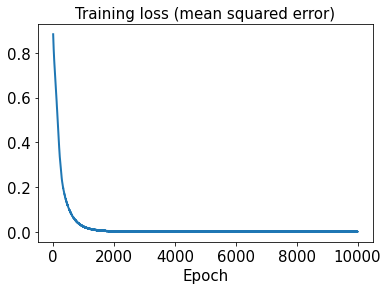

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

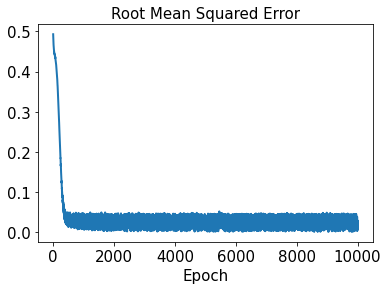

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 134ms/step - loss: 3.3970e-05 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.0869418002655943


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.08054153262377306


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.06704927793261743, 0.103697662213071, 0.04749976300593179, 0.07370314325413385, 0.03904829590402452, 0.08839314853423016, 0.05807529830188802, 0.08309055615430799, 0.04733051437052656, 0.10142604798735665, 0.09488841460602124, 0.10909431451171042, 0.0535137676984028, 0.10816714308110259, 0.07867421387835587, 0.11347269816747553, 0.07359011770541003, 0.012307285687932431, 0.11547090459945485, 0.07826505680843156, 0.10563672607817877, 0.11449909199712219, 0.1061118426851327, 0.028117536168895587, 0.08875111033053026, 0.08323386650538257, 0.01974859136916801, 0.02849529339374234, 0.0020141784465039034, 0.09835173012441734, 0.06403233393007612, 0.059921306245988085, 0.09771202584339143]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.03704851548888733, 0.0691327506120138, 0.09341826013640951, 0.0423401743151387, 0.11175944768130752, 0.06509625828120914, 0.016643893270383774, 0.08338283152121807]


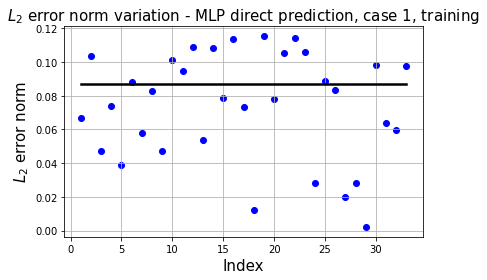

In [33]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

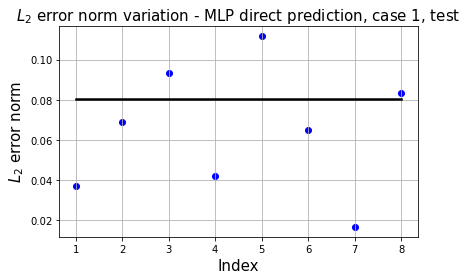

In [34]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

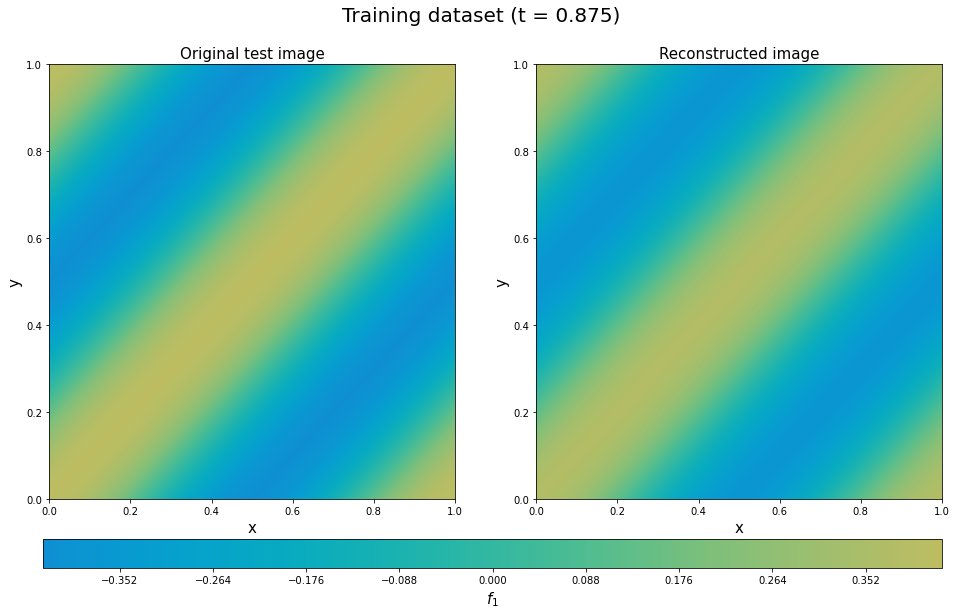

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

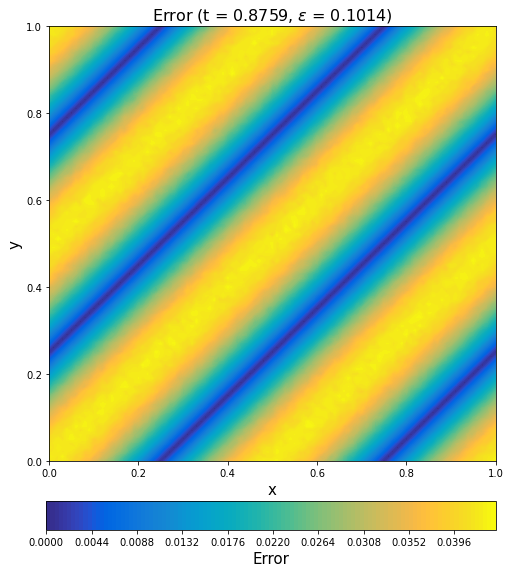

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

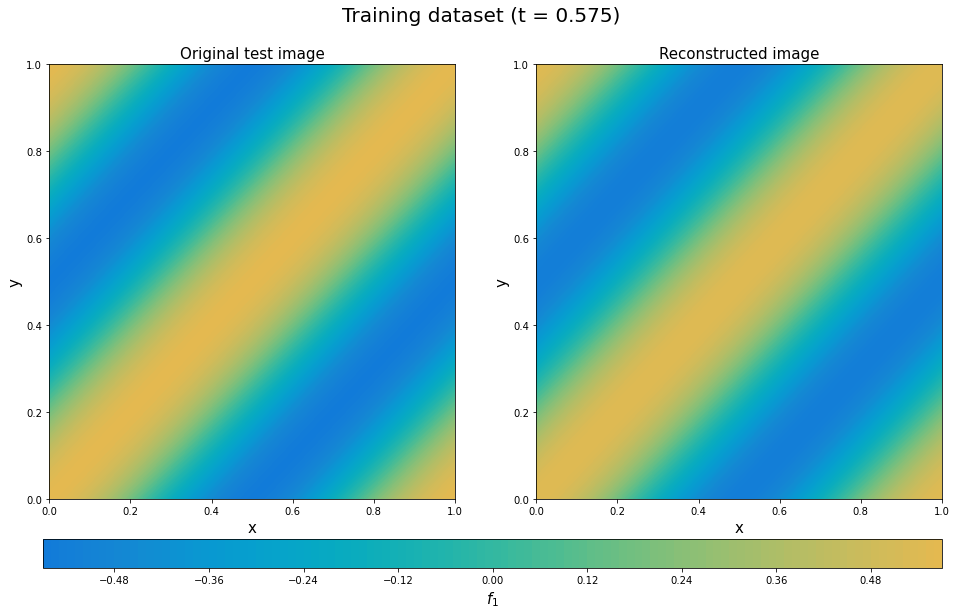

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

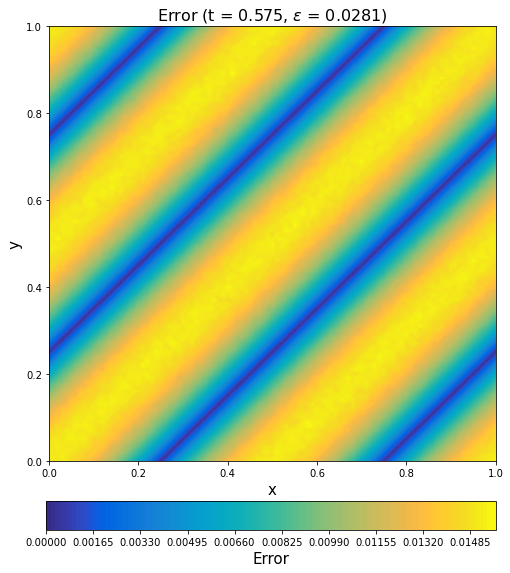

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

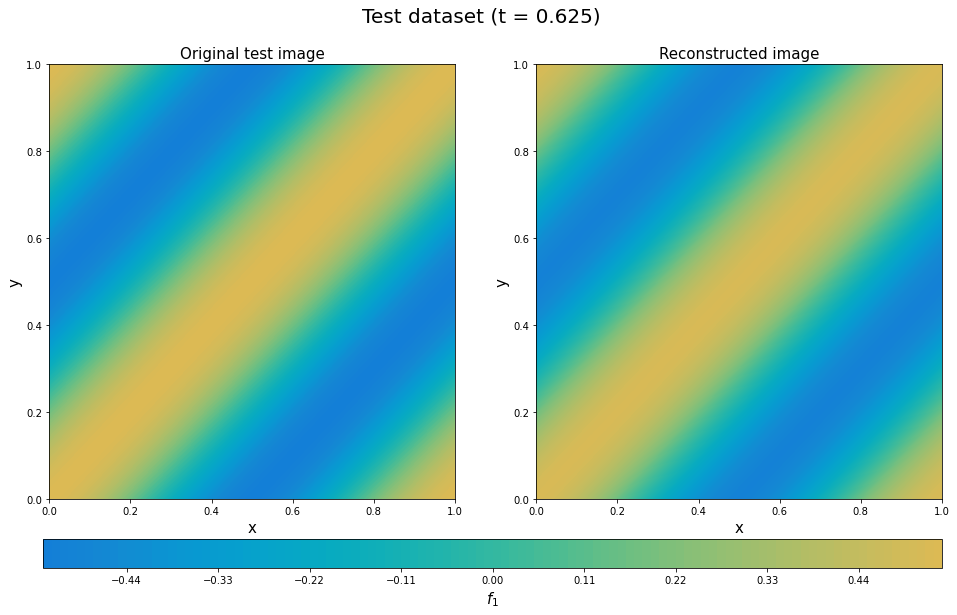

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

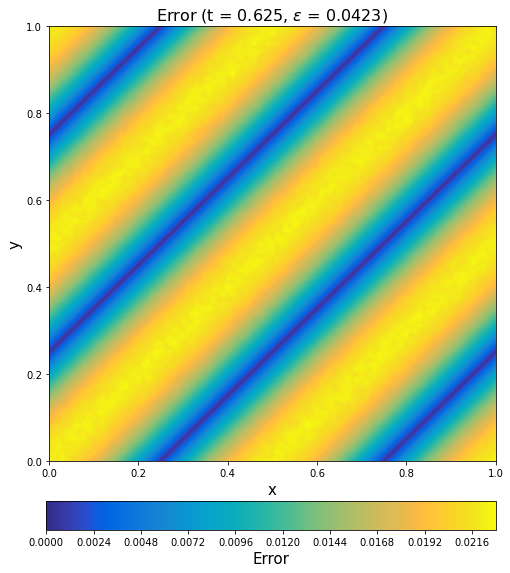

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

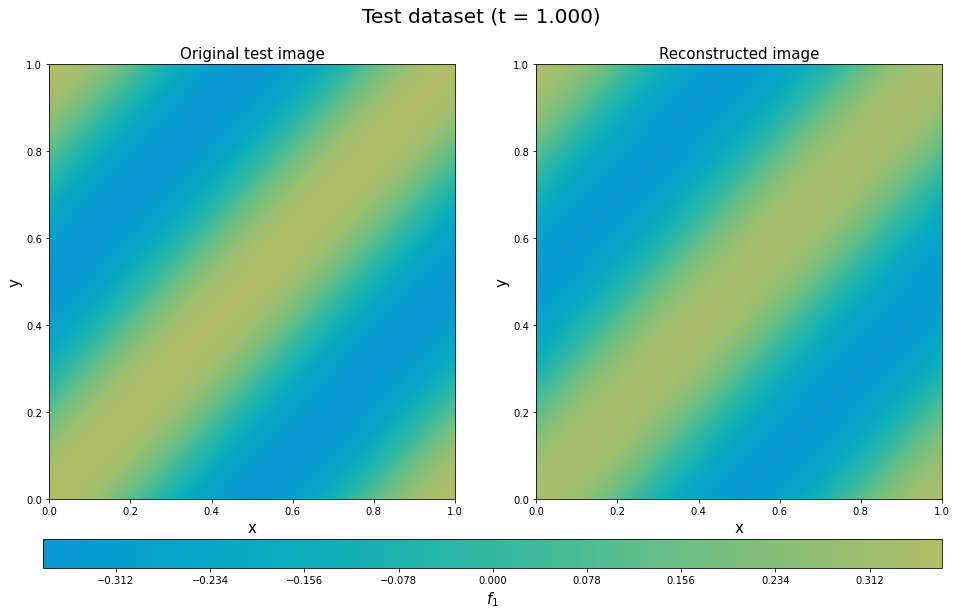

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

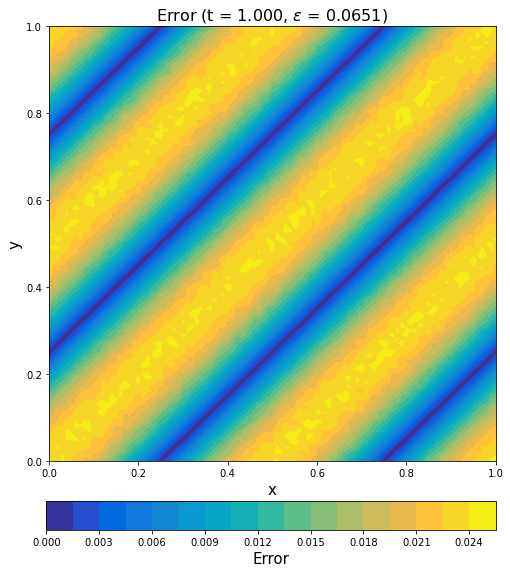

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

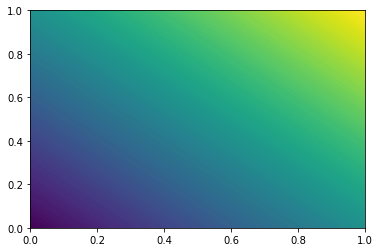

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 28ms/step - loss: 2.6976 - rmse: 1.6424
Epoch 2/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.6858 - rmse: 1.6388
Epoch 3/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.6750 - rmse: 1.6355
Epoch 4/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.6650 - rmse: 1.6325
Epoch 5/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6554 - rmse: 1.6295
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6462 - rmse: 1.6267
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6376 - rmse: 1.6241
Epoch 8/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6292 - rmse: 1.6215
Epoch 9/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6209 - rmse: 1.6189
Epoch 10/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6129 - rmse: 1.6164
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 2.0830 - rmse: 1.4432
Epoch 86/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0738 - rmse: 1.4400
Epoch 87/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0664 - rmse: 1.4374
Epoch 88/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0615 - rmse: 1.4357
Epoch 89/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0510 - rmse: 1.4321
Epoch 90/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0458 - rmse: 1.4303
Epoch 91/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0352 - rmse: 1.4265
Epoch 92/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0273 - rmse: 1.4238
Epoch 93/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0230 - rmse: 1.4222
Epoch 94/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0140 - rmse: 1.4191
Epoch 95/10000
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 1.4878 - rmse: 1.2197
Epoch 169/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4833 - rmse: 1.2178
Epoch 170/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4739 - rmse: 1.2139
Epoch 171/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4639 - rmse: 1.2098
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4593 - rmse: 1.2079
Epoch 173/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4555 - rmse: 1.2063
Epoch 174/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4467 - rmse: 1.2027
Epoch 175/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4367 - rmse: 1.1985
Epoch 176/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4289 - rmse: 1.1953
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4268 - rmse: 1.1944
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.9178 - rmse: 0.9579
Epoch 252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9054 - rmse: 0.9514
Epoch 253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9042 - rmse: 0.9508
Epoch 254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8963 - rmse: 0.9466
Epoch 255/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8888 - rmse: 0.9427
Epoch 256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8819 - rmse: 0.9390
Epoch 257/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.8758 - rmse: 0.9357
Epoch 258/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.8765 - rmse: 0.9361
Epoch 259/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.8672 - rmse: 0.9311
Epoch 260/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8582 - rmse: 0.9263
Epoch 261/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.4915 - rmse: 0.7010
Epoch 335/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4905 - rmse: 0.7002
Epoch 336/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4843 - rmse: 0.6958
Epoch 337/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4767 - rmse: 0.6903
Epoch 338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4727 - rmse: 0.6874
Epoch 339/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4681 - rmse: 0.6840
Epoch 340/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4649 - rmse: 0.6817
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4639 - rmse: 0.6810
Epoch 342/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4606 - rmse: 0.6785
Epoch 343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4519 - rmse: 0.6721
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.2293 - rmse: 0.4787
Epoch 418/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2255 - rmse: 0.4747
Epoch 419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2281 - rmse: 0.4774
Epoch 420/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2214 - rmse: 0.4704
Epoch 421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2222 - rmse: 0.4712
Epoch 422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2154 - rmse: 0.4640
Epoch 423/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2131 - rmse: 0.4614
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2142 - rmse: 0.4627
Epoch 425/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2094 - rmse: 0.4574
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2077 - rmse: 0.4555
Epoch 427/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0990 - rmse: 0.3144
Epoch 501/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0945 - rmse: 0.3072
Epoch 502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1004 - rmse: 0.3166
Epoch 503/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0979 - rmse: 0.3126
Epoch 504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0977 - rmse: 0.3124
Epoch 505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0943 - rmse: 0.3069
Epoch 506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0924 - rmse: 0.3037
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0897 - rmse: 0.2993
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0899 - rmse: 0.2996
Epoch 509/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0869 - rmse: 0.2945
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0422 - rmse: 0.2050
Epoch 584/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - rmse: 0.1907
Epoch 585/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0388 - rmse: 0.1967
Epoch 586/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0401 - rmse: 0.1998
Epoch 587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - rmse: 0.1924
Epoch 588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0345 - rmse: 0.1854
Epoch 589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - rmse: 0.1889
Epoch 590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0412 - rmse: 0.2026
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - rmse: 0.1859
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - rmse: 0.1969
Epoch 593/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0174 - rmse: 0.1316
Epoch 667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.1144
Epoch 668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0151 - rmse: 0.1224
Epoch 669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0147 - rmse: 0.1205
Epoch 670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0173 - rmse: 0.1309
Epoch 671/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0126 - rmse: 0.1115
Epoch 672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0184 - rmse: 0.1352
Epoch 673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.1176
Epoch 674/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.1392
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0171 - rmse: 0.1304
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0941
Epoch 750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0887
Epoch 752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - rmse: 0.1027
Epoch 753/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0079 - rmse: 0.0882
Epoch 754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0728
Epoch 755/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0102 - rmse: 0.1004
Epoch 756/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0115 - rmse: 0.1066
Epoch 757/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0077 - rmse: 0.0870
Epoch 758/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0077 - rmse: 0.0870
Epoch 759/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0537
Epoch 833/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 834/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 835/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0078 - rmse: 0.0873
Epoch 836/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0039 - rmse: 0.0614
Epoch 837/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0064 - rmse: 0.0789
Epoch 838/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 840/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 917/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0086 - rmse: 0.0921
Epoch 918/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0542
Epoch 920/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0695
Epoch 921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0393
Epoch 922/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.9748e-04 - rmse: 0.0295
Epoch 923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0661
Epoch 924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 925/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 1000/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 1001/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 1002/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 1003/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 1004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0847
Epoch 1005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 1006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 1007/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 1008/10000
2/2 [======

2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0881
Epoch 1081/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3727e-04 - rmse: 0.0226
Epoch 1082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 1083/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7027e-04 - rmse: 0.0273
Epoch 1084/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 1085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0745
Epoch 1087/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 1088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 1089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 1090/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0392
Epoch 1163/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 1164/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0517
Epoch 1165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 1166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0747
Epoch 1167/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 1168/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 1169/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 1170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 1171/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0803
Epoch 1172/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 1245/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0674
Epoch 1246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0798
Epoch 1247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 1248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 1249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0790
Epoch 1250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0611
Epoch 1251/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 1252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0474
Epoch 1253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 1254/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 9.6604e-04 - rmse: 0.0291
Epoch 1327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 1328/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.5970e-04 - rmse: 0.0273
Epoch 1329/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5870e-04 - rmse: 0.0064
Epoch 1330/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4588e-04 - rmse: 0.0151
Epoch 1331/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0778
Epoch 1332/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 1333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 1334/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 1335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 1336/

2/2 [==============================] - 0s 19ms/step - loss: 4.2272e-04 - rmse: 0.0175
Epoch 1409/10000
2/2 [==============================] - 0s 21ms/step - loss: 3.7202e-04 - rmse: 0.0160
Epoch 1410/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 1411/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 1412/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 1413/10000
2/2 [==============================] - 0s 16ms/step - loss: 8.3617e-04 - rmse: 0.0268
Epoch 1414/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0683
Epoch 1415/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 1416/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 1417/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 1418/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 1491/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4849e-04 - rmse: 0.0116
Epoch 1492/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0057 - rmse: 0.0746
Epoch 1493/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0466
Epoch 1494/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 1495/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 1496/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3251e-04 - rmse: 0.0109
Epoch 1497/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 1498/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0056 - rmse: 0.0739
Epoch 1499/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5235e-04 - rmse: 0.0184
Epoch 1500/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0772
Epoch 1573/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6094e-04 - rmse: 0.0123
Epoch 1574/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 1575/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.9553e-04 - rmse: 0.0136
Epoch 1576/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 1577/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 1578/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 1579/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 1580/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0763
Epoch 1581/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7714e-04 - rmse: 0.0216
Epoch 1582/10000

2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 1655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 1656/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3268e-04 - rmse: 0.0180
Epoch 1657/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 1658/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 1659/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0747
Epoch 1660/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0845e-04 - rmse: 0.0100
Epoch 1661/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0421
Epoch 1662/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0875
Epoch 1663/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0394
Epoch 1664/10000
2/2 [

2/2 [==============================] - 0s 17ms/step - loss: 0.0048 - rmse: 0.0682
Epoch 1737/10000
2/2 [==============================] - 0s 23ms/step - loss: 2.1014e-04 - rmse: 0.0102
Epoch 1738/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 1739/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2590e-04 - rmse: 0.0043
Epoch 1740/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.2629e-04 - rmse: 0.0286
Epoch 1741/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4027e-04 - rmse: 0.0058
Epoch 1742/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.5827e-04 - rmse: 0.0212
Epoch 1743/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0563
Epoch 1744/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 1745/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 1

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 1819/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 1820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0359
Epoch 1821/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0846
Epoch 1822/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.0083e-04 - rmse: 0.0282
Epoch 1823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 1824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 1825/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 1826/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 1827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 1828/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1901/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0903
Epoch 1902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 1903/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 1904/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 1905/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 1906/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 1907/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 1908/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8403e-04 - rmse: 0.0297
Epoch 1909/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0865
Epoch 1910/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 9.9729e-04 - rmse: 0.0299
Epoch 1983/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 1984/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 1985/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.9806e-04 - rmse: 0.0282
Epoch 1986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0495
Epoch 1987/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0396
Epoch 1988/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 1989/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 1990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0869
Epoch 1991/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 1992/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 2065/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0661
Epoch 2066/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 2067/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 2068/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0819
Epoch 2069/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 2070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 2071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 2072/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4966e-04 - rmse: 0.0122
Epoch 2073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 2074/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 2147/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 2148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 2149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 2150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0630
Epoch 2151/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3555e-04 - rmse: 0.0184
Epoch 2152/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5105e-04 - rmse: 0.0188
Epoch 2153/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 2154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 2155/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 2156/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 2229/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 2230/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 2231/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 2232/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 2233/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0873
Epoch 2234/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 2235/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 2236/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 2237/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0870
Epoch 2238/10000
2/2 [============

2/2 [==============================] - 0s 10ms/step - loss: 3.7078e-04 - rmse: 0.0166
Epoch 2311/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 2312/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 2313/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 2314/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 2315/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 2316/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 2317/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3114e-04 - rmse: 0.0153
Epoch 2318/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 2319/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 2320/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 2392/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 2393/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 2394/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6560e-04 - rmse: 0.0193
Epoch 2395/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 2396/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.0755e-04 - rmse: 0.0146
Epoch 2397/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 2398/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3558e-04 - rmse: 0.0155
Epoch 2399/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 2400/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9288e-04 - rmse: 0.0173
Epoch 2401/

2/2 [==============================] - 0s 9ms/step - loss: 1.8187e-04 - rmse: 0.0094
Epoch 2474/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6809e-04 - rmse: 0.0132
Epoch 2475/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0773
Epoch 2476/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 2477/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0553
Epoch 2478/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2414e-04 - rmse: 0.0114
Epoch 2479/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 2480/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0772
Epoch 2481/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 2482/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 2483/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 2556/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 2557/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 2558/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 2559/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 2560/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 2561/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 2562/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 2563/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9028e-04 - rmse: 0.0264
Epoch 2564/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.2762e-04 - rmse: 0.0183
Epoch 2565/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 2638/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 2639/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 2640/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0728
Epoch 2641/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5464e-04 - rmse: 0.0128
Epoch 2642/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 2643/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 2644/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9915e-04 - rmse: 0.0266
Epoch 2645/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3364e-04 - rmse: 0.0156
Epoch 2646/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1767e-04 - rmse: 0.0150
Epoch 2647/

Epoch 2719/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 2720/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0500
Epoch 2721/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 2722/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 2723/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 2724/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 2725/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3722e-04 - rmse: 0.0254
Epoch 2726/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 2727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 2728/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 

2/2 [==============================] - 0s 10ms/step - loss: 4.7267e-04 - rmse: 0.0196
Epoch 2802/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0510
Epoch 2803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 2804/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4449e-04 - rmse: 0.0160
Epoch 2805/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 2806/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 2807/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2808/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1158e-04 - rmse: 0.0180
Epoch 2809/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.9178e-04 - rmse: 0.0300
Epoch 2810/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 2811/

2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 2884/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 2885/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 2886/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3192e-04 - rmse: 0.0211
Epoch 2887/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0891
Epoch 2888/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9388e-04 - rmse: 0.0175
Epoch 2889/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 2890/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.2648e-04 - rmse: 0.0253
Epoch 2891/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.1305e-04 - rmse: 0.0287
Epoch 2892/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 2893/

Epoch 2965/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2494e-04 - rmse: 0.0209
Epoch 2966/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4432e-04 - rmse: 0.0125
Epoch 2967/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 2968/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0246e-04 - rmse: 0.0267
Epoch 2969/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3685e-04 - rmse: 0.0158
Epoch 2970/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0421
Epoch 2971/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 2972/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 2973/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1125e-04 - rmse: 0.0111
Epoch 2974/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rms

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 3047/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3343e-04 - rmse: 0.0187
Epoch 3048/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 3049/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0598
Epoch 3050/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9480e-04 - rmse: 0.0284
Epoch 3051/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 3052/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 3053/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 3054/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2734e-04 - rmse: 0.0290
Epoch 3055/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0607
Epoch 3056/1000

2/2 [==============================] - 0s 13ms/step - loss: 7.3947e-04 - rmse: 0.0256
Epoch 3129/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 3130/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 3131/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9142e-04 - rmse: 0.0225
Epoch 3132/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 3133/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 3134/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 3135/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 3136/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 3137/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0489
Epoch 3138/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 3211/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0465
Epoch 3212/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6423e-04 - rmse: 0.0134
Epoch 3213/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2391e-04 - rmse: 0.0118
Epoch 3214/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0466
Epoch 3215/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6300e-04 - rmse: 0.0195
Epoch 3216/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0877
Epoch 3217/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 3218/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.0265e-04 - rmse: 0.0205
Epoch 3219/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 3220/

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 3293/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 3294/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3835e-04 - rmse: 0.0236
Epoch 3295/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 3296/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 3297/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3418e-04 - rmse: 0.0235
Epoch 3298/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 3299/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 3300/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 3301/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 3302/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 3374/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8191e-04 - rmse: 0.0173
Epoch 3375/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 3376/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 3377/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8044e-04 - rmse: 0.0199
Epoch 3378/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 3379/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.6385e-04 - rmse: 0.0261
Epoch 3380/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9508e-04 - rmse: 0.0226
Epoch 3381/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0808
Epoch 3382/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 3383/

2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 3456/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1286e-04 - rmse: 0.0114
Epoch 3457/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 3458/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 3459/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 3460/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 3461/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 3462/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 3463/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 3464/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0819
Epoch 3465/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 3538/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 3539/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 3540/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 3541/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 3542/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 3543/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 3544/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 3545/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 3546/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 3547/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0598
Epoch 3620/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2886e-04 - rmse: 0.0273
Epoch 3621/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.0462e-04 - rmse: 0.0269
Epoch 3622/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 3623/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6083e-04 - rmse: 0.0279
Epoch 3624/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 3625/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 3626/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0085 - rmse: 0.0916
Epoch 3627/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 3628/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 3629/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 3702/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.6518e-04 - rmse: 0.0242
Epoch 3703/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.3567e-04 - rmse: 0.0160
Epoch 3704/10000
2/2 [==============================] - 0s 25ms/step - loss: 4.2748e-04 - rmse: 0.0186
Epoch 3705/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 3706/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 3707/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 3708/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 3709/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 3710/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 3711/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 3784/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 3785/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 3786/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 3787/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 3788/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 3789/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.1098e-04 - rmse: 0.0251
Epoch 3790/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 3791/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 3792/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 3793/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 6.7649e-04 - rmse: 0.0244
Epoch 3866/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.0954e-04 - rmse: 0.0230
Epoch 3867/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 3868/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0818
Epoch 3869/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 3870/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 3871/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 3872/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5865e-04 - rmse: 0.0261
Epoch 3873/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 3874/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6722e-04 - rmse: 0.0281
Epoch 3875/

2/2 [==============================] - 0s 12ms/step - loss: 4.0203e-04 - rmse: 0.0180
Epoch 3948/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 3949/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7336e-04 - rmse: 0.0222
Epoch 3950/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.5515e-04 - rmse: 0.0218
Epoch 3951/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 3952/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2836e-04 - rmse: 0.0122
Epoch 3953/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.4111e-04 - rmse: 0.0162
Epoch 3954/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 3955/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 3956/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 3

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 4029/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0411
Epoch 4030/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7036e-04 - rmse: 0.0299
Epoch 4031/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 4032/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 4033/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 4034/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6426e-04 - rmse: 0.0220
Epoch 4035/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 4036/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 4037/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 4038/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 6.7133e-04 - rmse: 0.0244
Epoch 4110/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5035e-04 - rmse: 0.0193
Epoch 4111/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8985e-04 - rmse: 0.0226
Epoch 4112/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 4113/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3322e-04 - rmse: 0.0160
Epoch 4114/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0604e-04 - rmse: 0.0181
Epoch 4115/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 4116/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 4117/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 4118/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 4

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 4192/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4174e-04 - rmse: 0.0294
Epoch 4193/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 4194/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 4195/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 4196/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 4197/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 4198/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4199/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 4200/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 4201/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 4274/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 4275/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 4276/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 4277/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 4278/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0824e-04 - rmse: 0.0152
Epoch 4279/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0904
Epoch 4280/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 4281/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 4282/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 4283/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 4355/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 4356/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2935e-04 - rmse: 0.0124
Epoch 4357/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 4358/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 4359/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 4360/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 4361/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 4362/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 4363/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8250e-04 - rmse: 0.0103
Epoch 4364/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 1.5884e-04 - rmse: 0.0091
Epoch 4436/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.2769e-04 - rmse: 0.0255
Epoch 4437/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4733e-04 - rmse: 0.0084
Epoch 4438/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.1968e-04 - rmse: 0.0211
Epoch 4439/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4440/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5629e-04 - rmse: 0.0167
Epoch 4441/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 4442/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.2678e-04 - rmse: 0.0212
Epoch 4443/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2637e-04 - rmse: 0.0158
Epoch 4444/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0640

2/2 [==============================] - 0s 13ms/step - loss: 3.6772e-04 - rmse: 0.0171
Epoch 4517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 4518/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.3565e-04 - rmse: 0.0161
Epoch 4519/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 4520/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 4521/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 4522/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 4523/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 4524/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 4525/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 4526/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 4599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 4600/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 4601/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 4602/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 4603/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 4604/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0385
Epoch 4605/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 4606/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 4607/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 4608/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 4681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 4682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 4683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 4684/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 4685/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 4686/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0862
Epoch 4687/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 4688/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 4689/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9147e-04 - rmse: 0.0204
Epoch 4690/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 4763/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0607
Epoch 4764/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9691e-04 - rmse: 0.0180
Epoch 4765/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0531
Epoch 4766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 4767/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 4768/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2845e-04 - rmse: 0.0235
Epoch 4769/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 4770/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9021e-04 - rmse: 0.0248
Epoch 4771/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 4772/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 4845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 4846/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 4847/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.0892e-04 - rmse: 0.0153
Epoch 4848/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 4849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 4850/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5327e-04 - rmse: 0.0089
Epoch 4851/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 4852/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 4853/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0787
Epoch 4854/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 4926/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2089e-04 - rmse: 0.0121
Epoch 4927/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6362e-04 - rmse: 0.0281
Epoch 4928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 4929/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0787
Epoch 4930/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 4931/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0527e-04 - rmse: 0.0152
Epoch 4932/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0180e-04 - rmse: 0.0251
Epoch 4933/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 4934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 4935/

2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 5007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0813
Epoch 5008/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.8415e-04 - rmse: 0.0203
Epoch 5009/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6289e-04 - rmse: 0.0095
Epoch 5010/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2414e-04 - rmse: 0.0071
Epoch 5011/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9055e-04 - rmse: 0.0178
Epoch 5012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 5013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 5014/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 5015/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 5016/

2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 5088/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 5089/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 5090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 5091/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 5092/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0587e-04 - rmse: 0.0208
Epoch 5093/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3639e-04 - rmse: 0.0128
Epoch 5094/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 5095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5096/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 5097/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0809
Epoch 5170/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 5171/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 5172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0837
Epoch 5173/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 5174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 5176/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0365e-04 - rmse: 0.0152
Epoch 5177/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 5178/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5179/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 2.8251e-04 - rmse: 0.0145
Epoch 5252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 5253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 5254/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9670e-04 - rmse: 0.0180
Epoch 5255/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 5256/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3477e-04 - rmse: 0.0128
Epoch 5257/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 5258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 5259/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0077 - rmse: 0.0871
Epoch 5260/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 5261/1000

2/2 [==============================] - 0s 11ms/step - loss: 6.2850e-04 - rmse: 0.0236
Epoch 5334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 5335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 5336/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.0006e-04 - rmse: 0.0251
Epoch 5337/10000
2/2 [==============================] - 0s 19ms/step - loss: 9.7702e-04 - rmse: 0.0301
Epoch 5338/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 5339/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0028 - rmse: 0.0520
Epoch 5340/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 5341/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 5342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 5343/1000

2/2 [==============================] - 0s 16ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 5416/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 5417/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5418/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 5419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 5420/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 5421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 5422/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 5423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 5424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 5425/10000
2/2 [=====

2/2 [==============================] - 0s 17ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 5498/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 5499/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9587e-04 - rmse: 0.0287
Epoch 5500/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1339e-04 - rmse: 0.0156
Epoch 5501/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.3414e-04 - rmse: 0.0162
Epoch 5502/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2485e-04 - rmse: 0.0073
Epoch 5503/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0645e-04 - rmse: 0.0153
Epoch 5504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 5505/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2920e-04 - rmse: 0.0257
Epoch 5506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epo

2/2 [==============================] - 0s 15ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 5580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 5581/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.3071e-04 - rmse: 0.0127
Epoch 5582/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7027e-04 - rmse: 0.0283
Epoch 5583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 5584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0385
Epoch 5585/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 5586/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 5587/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 5588/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3068e-04 - rmse: 0.0215
Epoch 5589/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 5662/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4479e-04 - rmse: 0.0194
Epoch 5663/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4212e-04 - rmse: 0.0193
Epoch 5664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 5665/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5666/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4234e-04 - rmse: 0.0239
Epoch 5667/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4149e-04 - rmse: 0.0278
Epoch 5668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0860
Epoch 5669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 5670/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 5671/

2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0848
Epoch 5744/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3177e-04 - rmse: 0.0162
Epoch 5745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 5746/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1033e-04 - rmse: 0.0119
Epoch 5747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0819
Epoch 5748/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 5749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 5750/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1320e-04 - rmse: 0.0066
Epoch 5751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 5753/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 5825/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5826/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3694e-04 - rmse: 0.0082
Epoch 5827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 5829/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0813
Epoch 5830/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.8598e-04 - rmse: 0.0248
Epoch 5831/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 5833/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 5834/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 5907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 5908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 5909/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 5910/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 5911/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 5912/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 5913/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5914/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 5915/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4486e-04 - rmse: 0.0218
Epoch 5916/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 5989/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 5990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 5991/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 5992/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1936e-04 - rmse: 0.0071
Epoch 5993/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9751e-04 - rmse: 0.0251
Epoch 5994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 5995/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 5996/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5279e-04 - rmse: 0.0092
Epoch 5997/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 5998/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 6071/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 6072/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 6073/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.0860e-04 - rmse: 0.0253
Epoch 6074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 6075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0808
Epoch 6076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0861
Epoch 6077/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 6078/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 6079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 6080/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 6152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 6153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 6154/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6181e-04 - rmse: 0.0198
Epoch 6155/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1459e-04 - rmse: 0.0211
Epoch 6156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 6157/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 6158/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3994e-04 - rmse: 0.0239
Epoch 6159/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4398e-04 - rmse: 0.0296
Epoch 6160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 6161/

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 6233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0871
Epoch 6234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6235/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 6236/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 6237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 6238/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3903e-04 - rmse: 0.0164
Epoch 6239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 6240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 6241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 6242/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 6315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 6316/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7237e-04 - rmse: 0.0246
Epoch 6317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 6318/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 6319/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6336e-04 - rmse: 0.0140
Epoch 6320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 6321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 6322/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 6323/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 6324/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 6396/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6397/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 6398/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1389e-04 - rmse: 0.0121
Epoch 6399/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 6400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6401/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 6402/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1412e-04 - rmse: 0.0254
Epoch 6403/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6159e-04 - rmse: 0.0097
Epoch 6404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 6405/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 6478/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 6479/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 6480/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 6481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 6482/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 6483/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 6484/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 6485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 6487/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 6560/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 6561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 6562/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 6563/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 6564/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 6565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0890
Epoch 6566/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 6567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 6568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 6569/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 6642/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 6643/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0522
Epoch 6644/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 6645/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 6646/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 6647/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 6648/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0861
Epoch 6649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0825
Epoch 6650/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 6651/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 6724/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 6725/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 6726/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0842
Epoch 6727/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.0092e-04 - rmse: 0.0231
Epoch 6728/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8990e-04 - rmse: 0.0150
Epoch 6729/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 6730/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6731/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1570e-04 - rmse: 0.0158
Epoch 6732/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0929e-04 - rmse: 0.0211
Epoch 6733/

2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 6805/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5444e-04 - rmse: 0.0094
Epoch 6806/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 6807/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 6808/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 6809/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 6810/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 6811/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6996e-04 - rmse: 0.0143
Epoch 6812/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 6813/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 6814/10000
2/

Epoch 6886/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 6887/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 6888/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 6889/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2337e-04 - rmse: 0.0214
Epoch 6890/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 6891/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 6892/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 6894/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6895/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5064e-04 - rmse: 0.0092
Ep

2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 6968/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 6969/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 6970/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6971/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0085 - rmse: 0.0916
Epoch 6972/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 6973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 6974/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 6975/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 6976/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 6977/10000
2/2 [=====

Epoch 7049/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7050/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 7051/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 7052/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 7053/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5499e-04 - rmse: 0.0138
Epoch 7054/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0470
Epoch 7055/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 7056/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 7057/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 7058/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9498e-04 - rmse: 0.0152
Ep

2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 7132/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 7133/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 7134/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 7135/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 7136/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 7137/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 7138/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 7139/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 7140/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 7141/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 7214/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7511e-04 - rmse: 0.0226
Epoch 7215/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0755
Epoch 7216/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7217/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 7218/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7219/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7220/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 7221/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4001e-04 - rmse: 0.0296
Epoch 7222/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7223/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 7296/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 7297/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 7298/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 7299/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 7300/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 7301/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 7302/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 7303/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0757
Epoch 7304/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6733e-04 - rmse: 0.0283
Epoch 7305/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 7378/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 7379/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 7380/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7381/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 7382/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8479e-04 - rmse: 0.0249
Epoch 7383/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 7384/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0386e-04 - rmse: 0.0154
Epoch 7385/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2856e-04 - rmse: 0.0080
Epoch 7386/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2273e-04 - rmse: 0.0160
Epoch 7387/

2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 7460/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 7461/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.5956e-04 - rmse: 0.0199
Epoch 7462/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 7463/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 7464/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5032e-04 - rmse: 0.0298
Epoch 7465/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 7466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 7467/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 7468/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 7469/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 7541/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 7542/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3954e-04 - rmse: 0.0166
Epoch 7543/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4253e-04 - rmse: 0.0134
Epoch 7544/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 7545/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 7546/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7547/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1818e-04 - rmse: 0.0124
Epoch 7548/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2628e-04 - rmse: 0.0190
Epoch 7549/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 7550/

2/2 [==============================] - 0s 12ms/step - loss: 9.2253e-05 - rmse: 0.0053
Epoch 7622/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 7623/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 7624/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 7625/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3933e-04 - rmse: 0.0194
Epoch 7626/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 7627/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 7628/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.1604e-04 - rmse: 0.0255
Epoch 7629/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 7630/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 7631/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 7704/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 7705/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 7706/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 7707/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 7708/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 7709/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 7710/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 7711/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 7712/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 7713/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 7786/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 7787/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 7788/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 7789/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 7790/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 7791/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0848
Epoch 7792/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 7793/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7794/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 7795/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 7868/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7869/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8417e-04 - rmse: 0.0179
Epoch 7870/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4710e-04 - rmse: 0.0091
Epoch 7871/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 7872/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 7873/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 7874/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0069 - rmse: 0.0825
Epoch 7875/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 7876/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.8443e-04 - rmse: 0.0179
Epoch 7877/1000

2/2 [==============================] - 0s 16ms/step - loss: 3.9235e-04 - rmse: 0.0182
Epoch 7950/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 7951/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.0410e-04 - rmse: 0.0063
Epoch 7952/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.7730e-04 - rmse: 0.0302
Epoch 7953/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 7954/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7955/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.8712e-04 - rmse: 0.0150
Epoch 7956/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 7957/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4745e-04 - rmse: 0.0091
Epoch 7958/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 7

Epoch 8031/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 8032/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8033/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 8034/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 8035/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0520
Epoch 8036/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 8037/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8038/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5078e-04 - rmse: 0.0221
Epoch 8039/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 8040/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 

2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0895
Epoch 8114/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 8115/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8116/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 8117/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0332e-04 - rmse: 0.0118
Epoch 8118/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 8119/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 8120/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 8121/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 8122/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6691e-04 - rmse: 0.0143
Epoch 8123/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 8196/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 8197/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0787
Epoch 8198/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8199/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1607e-04 - rmse: 0.0124
Epoch 8200/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 8201/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6373e-04 - rmse: 0.0300
Epoch 8202/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1003e-04 - rmse: 0.0121
Epoch 8203/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0396e-04 - rmse: 0.0119
Epoch 8204/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9404e-04 - rmse: 0.0230
Epoch 8

2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 8277/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 8278/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 8279/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 8280/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 8281/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 8282/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 8283/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 8284/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 8285/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2024e-04 - rmse: 0.0293
Epoch 8286/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 8359/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8662e-04 - rmse: 0.0180
Epoch 8360/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 8361/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 8362/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3474e-04 - rmse: 0.0131
Epoch 8363/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7497e-04 - rmse: 0.0146
Epoch 8364/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 8365/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 8366/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8313e-04 - rmse: 0.0205
Epoch 8367/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8368/

Epoch 8440/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 8441/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8831e-05 - rmse: 0.0023
Epoch 8442/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0470
Epoch 8443/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 8444/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 8445/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9910e-04 - rmse: 0.0271
Epoch 8446/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 8447/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0730
Epoch 8448/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0818
Epoch 8449/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0502
Ep

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 8523/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6809e-04 - rmse: 0.0175
Epoch 8524/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 8525/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7705e-04 - rmse: 0.0107
Epoch 8526/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 8527/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 8528/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4446e-04 - rmse: 0.0168
Epoch 8529/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 8530/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6745e-04 - rmse: 0.0102
Epoch 8531/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0728
Epoch 8532/

2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0862
Epoch 8604/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 8605/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 8606/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 8607/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1255e-04 - rmse: 0.0235
Epoch 8608/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 8609/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 8610/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0710e-04 - rmse: 0.0290
Epoch 8611/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5762e-04 - rmse: 0.0299
Epoch 8612/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 8613/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 8686/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 8687/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 8688/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 8689/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0891
Epoch 8690/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 8691/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4899e-04 - rmse: 0.0281
Epoch 8692/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 8693/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 8694/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8695/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 8768/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8769/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 8770/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 8771/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 8772/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 8773/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 8774/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0813
Epoch 8775/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 8776/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7144e-05 - rmse: 0.0039
Epoch 8777/10000
2/2 [=

Epoch 8849/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 8850/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 8851/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0081 - rmse: 0.0895
Epoch 8852/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 8853/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 8854/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 8855/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1508e-04 - rmse: 0.0255
Epoch 8856/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 8857/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 8858/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 8932/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 8933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0760
Epoch 8934/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 8935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 8936/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8937/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 8938/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8939/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.5342e-04 - rmse: 0.0243
Epoch 8940/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 8941/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 9.3410e-04 - rmse: 0.0295
Epoch 9014/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.3996e-04 - rmse: 0.0279
Epoch 9015/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 9016/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 9017/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 9018/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 9019/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 9020/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 9021/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 9022/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 9023/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 9096/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 9097/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0849
Epoch 9098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 9099/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 9100/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 9101/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 9102/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 9103/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 9104/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 9105/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0914
Epoch 9178/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 9179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 9180/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3236e-04 - rmse: 0.0295
Epoch 9181/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6861e-04 - rmse: 0.0225
Epoch 9182/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6159e-04 - rmse: 0.0300
Epoch 9183/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 9184/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.3759e-04 - rmse: 0.0194
Epoch 9185/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2945e-04 - rmse: 0.0277
Epoch 9186/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 91

2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 9260/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 9261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 9262/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 9263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 9264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 9265/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 9266/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 9267/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 9268/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 9269/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 5.5625e-04 - rmse: 0.0223
Epoch 9342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 9343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 9344/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.4402e-04 - rmse: 0.0196
Epoch 9345/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 9346/10000
2/2 [==============================] - 0s 15ms/step - loss: 8.3699e-04 - rmse: 0.0278
Epoch 9347/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 9348/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 9349/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 9350/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4517e-04 - rmse: 0.0220
Epoch 9351/

2/2 [==============================] - 0s 21ms/step - loss: 5.0786e-04 - rmse: 0.0211
Epoch 9423/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 9424/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 9425/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 9426/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 9428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 9429/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 9430/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 9432/10000
2/2 [=

2/2 [==============================] - 0s 16ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 9505/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9995e-04 - rmse: 0.0272
Epoch 9506/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 9507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0678
Epoch 9508/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8350e-04 - rmse: 0.0229
Epoch 9509/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8963e-04 - rmse: 0.0288
Epoch 9510/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.7518e-04 - rmse: 0.0267
Epoch 9511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 9512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 9513/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 9514/

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 9587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0849
Epoch 9588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 9589/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 9590/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 9591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 9592/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 9593/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 9594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 9595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 9596/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 9669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 9670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 9671/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0235e-04 - rmse: 0.0156
Epoch 9672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 9673/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 9674/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2800e-04 - rmse: 0.0130
Epoch 9675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 9676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 9677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 9678/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 9751/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 9753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 9754/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2862e-04 - rmse: 0.0295
Epoch 9755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 9756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 9757/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 9758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 9759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 9760/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 9833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 9834/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 9835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 9837/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.6692e-04 - rmse: 0.0284
Epoch 9838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9839/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0145e-04 - rmse: 0.0118
Epoch 9840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 9841/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.2198e-04 - rmse: 0.0257
Epoch 9842/1000

2/2 [==============================] - 0s 12ms/step - loss: 9.3219e-04 - rmse: 0.0295
Epoch 9915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 9916/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7577e-04 - rmse: 0.0227
Epoch 9917/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 9918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 9919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 9920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 9921/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 9922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 9923/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 9924/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 9996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 9997/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 9998/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 9999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 10000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0841


In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:04:20.692419


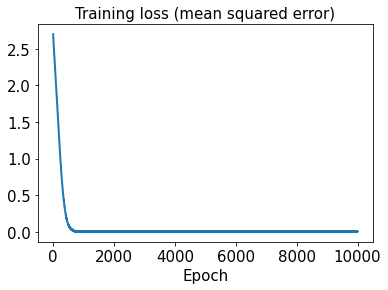

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

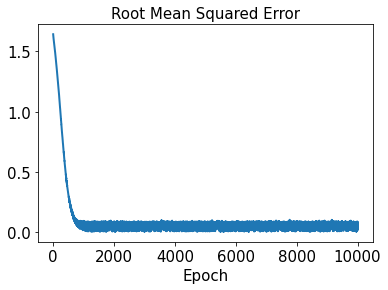

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 111ms/step - loss: 6.0177e-05 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.08118753794500114


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.07330275755556255


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.061306491298655355, 0.1347441822786724, 0.04555132387934633, 0.07806802477564043, 0.03795477801560877, 0.10526802776599681, 0.053200741649865615, 0.07372538841221454, 0.04545274219288415, 0.07706550776765331, 0.0762154248570316, 0.184104276557146, 0.050961300737534694, 0.14435065952034995, 0.08694340341513118, 0.18338690258715126, 0.06624673865892537, 0.01574580999570328, 0.17496202729909882, 0.07105448862936913, 0.07663775307609008, 0.1647167850134604, 0.07684554152056627, 0.028477665637053808, 0.0749845780489505, 0.0960735605494884, 0.022224755963570094, 0.030966671935800633, 0.008410936352897448, 0.12486265352105029, 0.061210681399555086, 0.056262164204389786, 0.07644137029225392]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.0345162851170724, 0.0694953135846228, 0.11486150009054964, 0.04011581433488074, 0.1543345560906403, 0.06624980794577799, 0.016863875274027187, 0.07502287210450777]


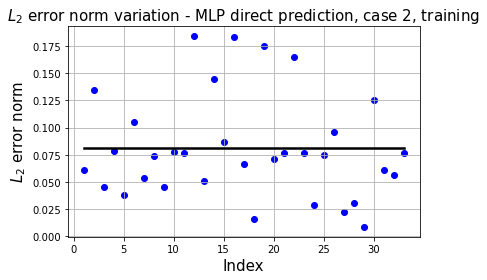

In [65]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

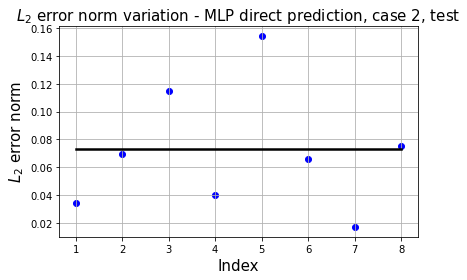

In [66]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

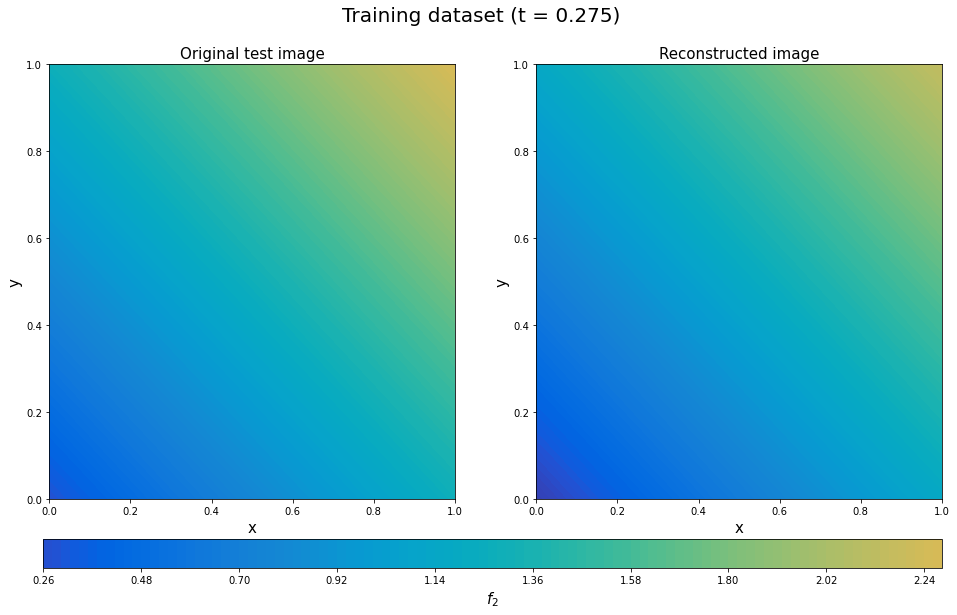

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

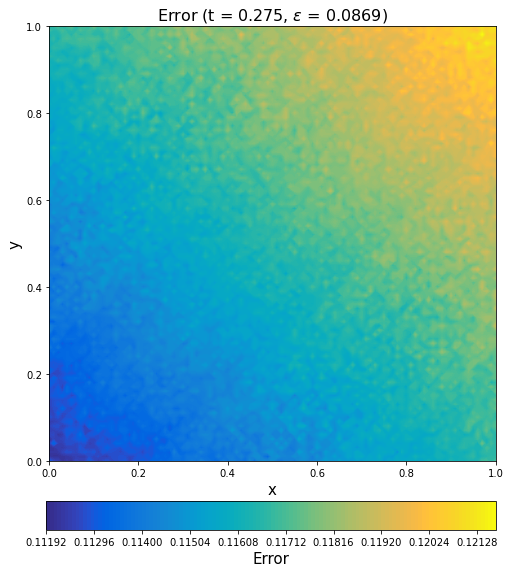

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

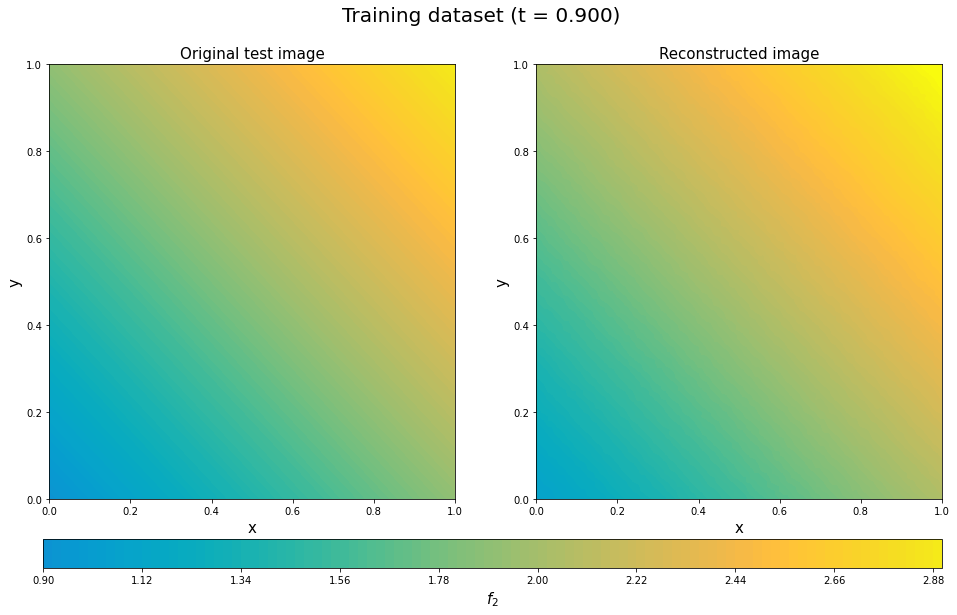

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

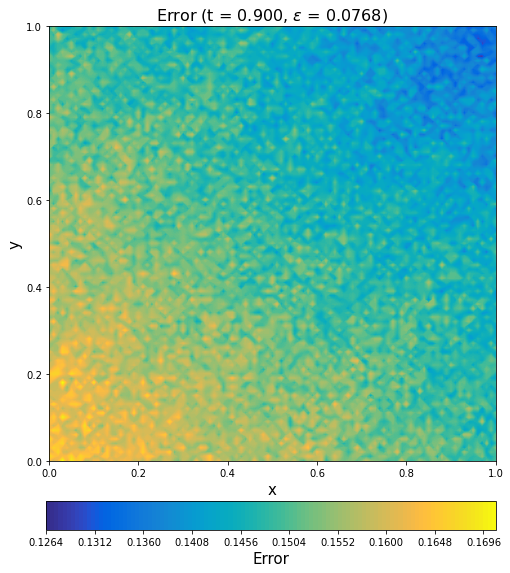

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

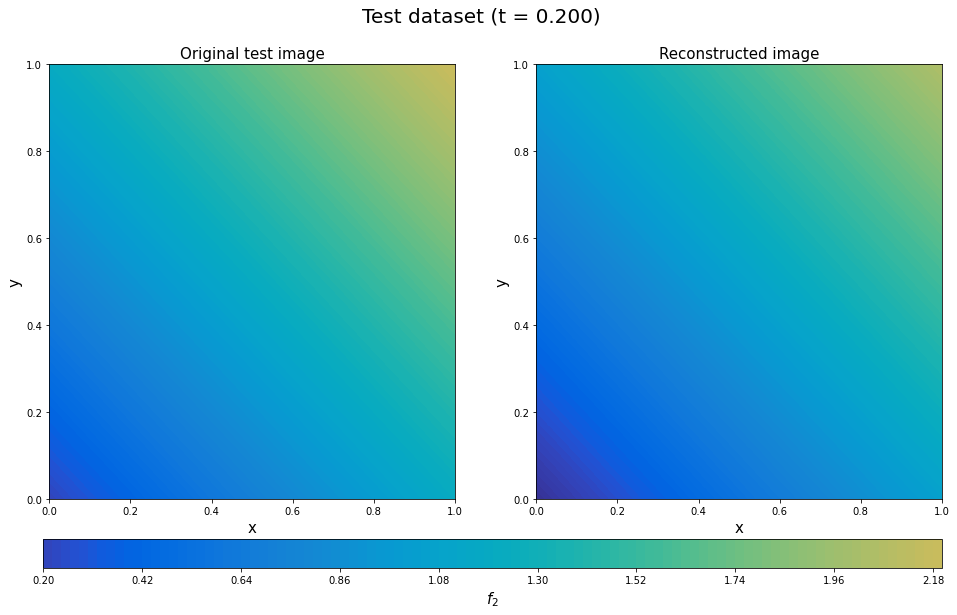

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

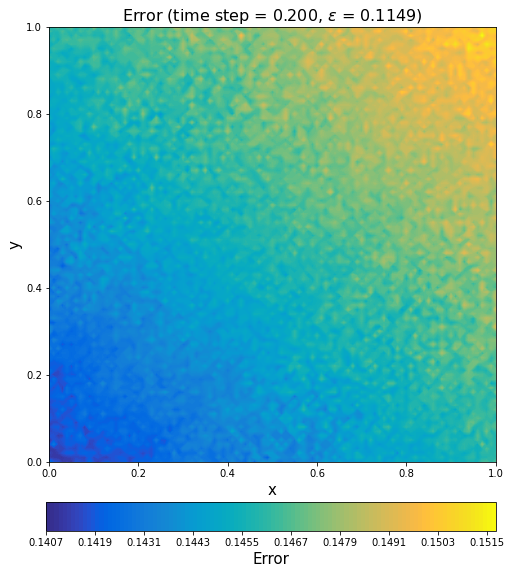

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

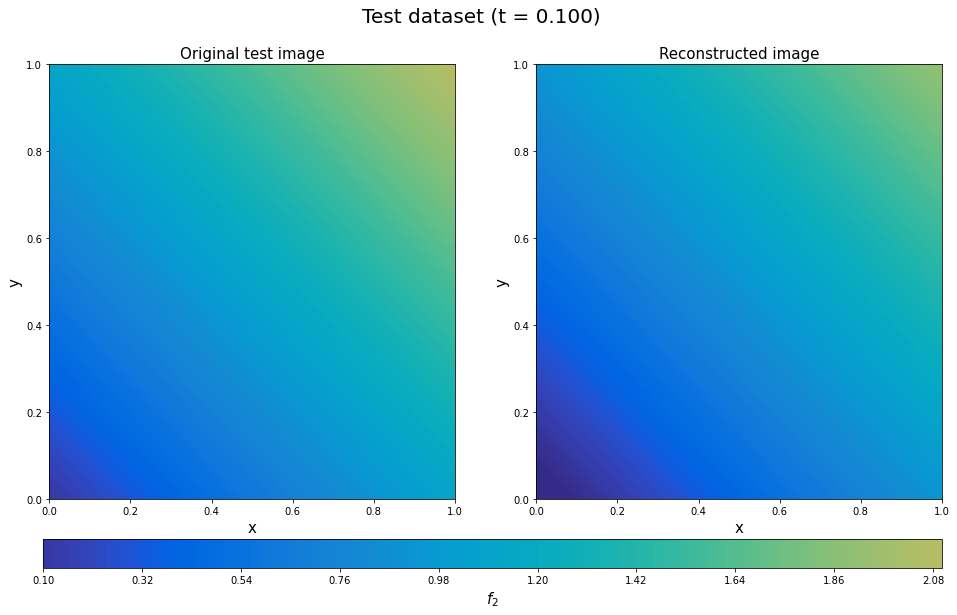

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

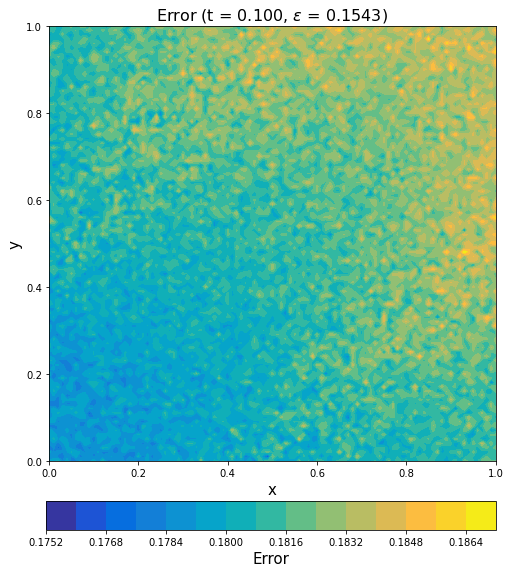

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

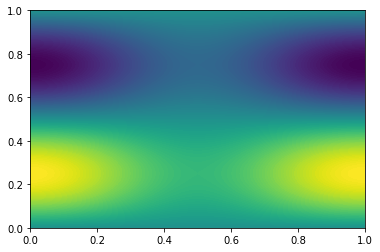

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 51ms/step - loss: 3.8055 - rmse: 1.9507
Epoch 2/10000
2/2 [==============================] - 0s 27ms/step - loss: 3.7720 - rmse: 1.9422
Epoch 3/10000
2/2 [==============================] - 0s 21ms/step - loss: 3.7408 - rmse: 1.9341
Epoch 4/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7121 - rmse: 1.9267
Epoch 5/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6844 - rmse: 1.9195
Epoch 6/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6572 - rmse: 1.9124
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6324 - rmse: 1.9059
Epoch 8/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6079 - rmse: 1.8994
Epoch 9/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5855 - rmse: 1.8935
Epoch 10/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5637 - rmse: 1.8878
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 15ms/step - loss: 2.4173 - rmse: 1.5547
Epoch 86/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.4058 - rmse: 1.5510
Epoch 87/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.3941 - rmse: 1.5472
Epoch 88/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.3814 - rmse: 1.5432
Epoch 89/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.3712 - rmse: 1.5398
Epoch 90/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3588 - rmse: 1.5358
Epoch 91/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3488 - rmse: 1.5325
Epoch 92/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.3374 - rmse: 1.5288
Epoch 93/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3259 - rmse: 1.5251
Epoch 94/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3153 - rmse: 1.5216
Epoch 95/10000
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 1.6593 - rmse: 1.2881
Epoch 169/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6568 - rmse: 1.2871
Epoch 170/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6452 - rmse: 1.2826
Epoch 171/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6389 - rmse: 1.2801
Epoch 172/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6324 - rmse: 1.2776
Epoch 173/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6248 - rmse: 1.2746
Epoch 174/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6176 - rmse: 1.2718
Epoch 175/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6128 - rmse: 1.2699
Epoch 176/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6053 - rmse: 1.2669
Epoch 177/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5981 - rmse: 1.2641
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 1.1880 - rmse: 1.0898
Epoch 252/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1840 - rmse: 1.0880
Epoch 253/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1778 - rmse: 1.0851
Epoch 254/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1749 - rmse: 1.0838
Epoch 255/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1735 - rmse: 1.0832
Epoch 256/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1708 - rmse: 1.0819
Epoch 257/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1620 - rmse: 1.0778
Epoch 258/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1568 - rmse: 1.0754
Epoch 259/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1585 - rmse: 1.0762
Epoch 260/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1467 - rmse: 1.0707
Epoch 261/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.8736 - rmse: 0.9345
Epoch 335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8740 - rmse: 0.9347
Epoch 336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8713 - rmse: 0.9333
Epoch 337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8645 - rmse: 0.9296
Epoch 338/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8696 - rmse: 0.9323
Epoch 339/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8615 - rmse: 0.9280
Epoch 340/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8555 - rmse: 0.9248
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8535 - rmse: 0.9237
Epoch 342/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8524 - rmse: 0.9231
Epoch 343/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8465 - rmse: 0.9199
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.6570 - rmse: 0.8104
Epoch 418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6560 - rmse: 0.8097
Epoch 419/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6547 - rmse: 0.8089
Epoch 420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6487 - rmse: 0.8052
Epoch 421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6502 - rmse: 0.8061
Epoch 422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6444 - rmse: 0.8026
Epoch 423/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6418 - rmse: 0.8009
Epoch 424/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.6416 - rmse: 0.8008
Epoch 425/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6399 - rmse: 0.7997
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6392 - rmse: 0.7993
Epoch 427/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.5011 - rmse: 0.7076
Epoch 501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4946 - rmse: 0.7030
Epoch 502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4925 - rmse: 0.7015
Epoch 503/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4877 - rmse: 0.6981
Epoch 504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4885 - rmse: 0.6987
Epoch 505/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4844 - rmse: 0.6957
Epoch 506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4838 - rmse: 0.6953
Epoch 507/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4840 - rmse: 0.6954
Epoch 508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4829 - rmse: 0.6946
Epoch 509/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4847 - rmse: 0.6959
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.3666 - rmse: 0.6052
Epoch 584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3617 - rmse: 0.6011
Epoch 585/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3603 - rmse: 0.5999
Epoch 586/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3607 - rmse: 0.6002
Epoch 587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3574 - rmse: 0.5975
Epoch 588/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3564 - rmse: 0.5966
Epoch 589/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3585 - rmse: 0.5984
Epoch 590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3538 - rmse: 0.5945
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3536 - rmse: 0.5943
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3549 - rmse: 0.5954
Epoch 593/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.2628 - rmse: 0.5123
Epoch 667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2622 - rmse: 0.5117
Epoch 668/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2643 - rmse: 0.5137
Epoch 669/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2590 - rmse: 0.5086
Epoch 670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2671 - rmse: 0.5164
Epoch 671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2573 - rmse: 0.5068
Epoch 672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2580 - rmse: 0.5076
Epoch 673/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2605 - rmse: 0.5100
Epoch 674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2554 - rmse: 0.5050
Epoch 675/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2570 - rmse: 0.5066
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.1841 - rmse: 0.4286
Epoch 750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1830 - rmse: 0.4274
Epoch 751/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1809 - rmse: 0.4249
Epoch 752/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1804 - rmse: 0.4243
Epoch 753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1852 - rmse: 0.4299
Epoch 754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1802 - rmse: 0.4241
Epoch 755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1776 - rmse: 0.4210
Epoch 756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1770 - rmse: 0.4203
Epoch 757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1827 - rmse: 0.4270
Epoch 758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1750 - rmse: 0.4179
Epoch 759/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.1256 - rmse: 0.3539
Epoch 833/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1223 - rmse: 0.3492
Epoch 834/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1251 - rmse: 0.3532
Epoch 835/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1215 - rmse: 0.3480
Epoch 836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1237 - rmse: 0.3512
Epoch 837/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1189 - rmse: 0.3444
Epoch 838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1252 - rmse: 0.3533
Epoch 839/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1187 - rmse: 0.3440
Epoch 840/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1174 - rmse: 0.3421
Epoch 841/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1166 - rmse: 0.3409
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0859 - rmse: 0.2926
Epoch 916/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0764 - rmse: 0.2759
Epoch 917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0786 - rmse: 0.2798
Epoch 918/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0790 - rmse: 0.2805
Epoch 919/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0749 - rmse: 0.2731
Epoch 920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0789 - rmse: 0.2803
Epoch 921/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0759 - rmse: 0.2750
Epoch 922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0754 - rmse: 0.2740
Epoch 923/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0736 - rmse: 0.2707
Epoch 924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0729 - rmse: 0.2694
Epoch 925/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0476 - rmse: 0.2176
Epoch 999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0481 - rmse: 0.2186
Epoch 1000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0554 - rmse: 0.2347
Epoch 1001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0477 - rmse: 0.2178
Epoch 1002/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0464 - rmse: 0.2148
Epoch 1003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0528 - rmse: 0.2292
Epoch 1004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0498 - rmse: 0.2225
Epoch 1005/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0467 - rmse: 0.2153
Epoch 1006/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0490 - rmse: 0.2206
Epoch 1007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0472 - rmse: 0.2167
Epoch 1008/10000
2/2 [======

2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - rmse: 0.1884
Epoch 1081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0284 - rmse: 0.1679
Epoch 1082/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0275 - rmse: 0.1651
Epoch 1083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0274 - rmse: 0.1648
Epoch 1084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0258 - rmse: 0.1597
Epoch 1085/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0282 - rmse: 0.1672
Epoch 1086/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0264 - rmse: 0.1617
Epoch 1087/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0262 - rmse: 0.1611
Epoch 1088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0251 - rmse: 0.1575
Epoch 1089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0274 - rmse: 0.1646
Epoch 1090/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0162 - rmse: 0.1262
Epoch 1163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0210 - rmse: 0.1442
Epoch 1164/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0155 - rmse: 0.1236
Epoch 1165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0150 - rmse: 0.1215
Epoch 1166/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0139 - rmse: 0.1168
Epoch 1167/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0197 - rmse: 0.1394
Epoch 1168/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0146 - rmse: 0.1198
Epoch 1169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0204 - rmse: 0.1420
Epoch 1170/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0165 - rmse: 0.1274
Epoch 1171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.1147
Epoch 1172/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0866
Epoch 1245/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 1246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0852
Epoch 1247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0895
Epoch 1248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0918
Epoch 1249/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0901
Epoch 1250/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0165 - rmse: 0.1275
Epoch 1251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0902
Epoch 1252/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 1253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0924
Epoch 1254/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0726
Epoch 1327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0618
Epoch 1328/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 1329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 1330/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 1331/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0647
Epoch 1332/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 1333/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 1334/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0061 - rmse: 0.0769
Epoch 1335/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0078 - rmse: 0.0870
Epoch 1336/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0531
Epoch 1409/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0723
Epoch 1410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 1411/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0020 - rmse: 0.0428
Epoch 1412/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0020 - rmse: 0.0431
Epoch 1413/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0447
Epoch 1414/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0029 - rmse: 0.0523
Epoch 1415/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 1416/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 1417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0713
Epoch 1418/10000
2/2 [=====

2/2 [==============================] - 0s 23ms/step - loss: 0.0104 - rmse: 0.1009
Epoch 1491/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 1492/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0048 - rmse: 0.0677
Epoch 1493/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 1494/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 1495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 1496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0599
Epoch 1497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 1498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0649
Epoch 1499/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0301
Epoch 1500/10000
2/2 [======

2/2 [==============================] - 0s 15ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 1573/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7354e-04 - rmse: 0.0201
Epoch 1574/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3427e-04 - rmse: 0.0238
Epoch 1575/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.2589e-04 - rmse: 0.0236
Epoch 1576/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2060e-04 - rmse: 0.0256
Epoch 1577/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0424
Epoch 1578/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 1579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0567
Epoch 1580/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3446e-04 - rmse: 0.0238
Epoch 1581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0853
Epoch 1

2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 1655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0482
Epoch 1656/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.1790e-04 - rmse: 0.0275
Epoch 1657/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 1658/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0425
Epoch 1659/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.4407e-04 - rmse: 0.0196
Epoch 1660/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.3216e-04 - rmse: 0.0278
Epoch 1661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0928
Epoch 1662/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.2914e-04 - rmse: 0.0259
Epoch 1663/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7418e-04 - rmse: 0.0227
Epoch 1

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 1736/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0420
Epoch 1737/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5848e-04 - rmse: 0.0225
Epoch 1738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0552
Epoch 1739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 1740/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0968
Epoch 1741/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 1742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 1743/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 1744/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0333
Epoch 1745/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0779
Epoch 1818/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 1819/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 1820/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.3877e-04 - rmse: 0.0171
Epoch 1821/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0914
Epoch 1822/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2162e-04 - rmse: 0.0133
Epoch 1823/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 1824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0429
Epoch 1825/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 1826/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0084 - rmse: 0.0908
Epoch 1827/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 1900/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0197e-04 - rmse: 0.0215
Epoch 1901/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 1902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 1903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 1904/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7800e-04 - rmse: 0.0184
Epoch 1905/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0844
Epoch 1906/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 1907/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.2694e-04 - rmse: 0.0137
Epoch 1908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 1909/1000

2/2 [==============================] - 0s 12ms/step - loss: 3.8117e-04 - rmse: 0.0157
Epoch 1982/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 1983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 1984/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 1985/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6074e-04 - rmse: 0.0250
Epoch 1986/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0661
Epoch 1987/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2865e-04 - rmse: 0.0172
Epoch 1988/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 1989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 1990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 1991/1000

2/2 [==============================] - 0s 10ms/step - loss: 6.1148e-04 - rmse: 0.0220
Epoch 2063/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 2064/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 2065/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 2066/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0535
Epoch 2067/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.9326e-04 - rmse: 0.0216
Epoch 2068/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0535
Epoch 2069/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.3095e-04 - rmse: 0.0101
Epoch 2070/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 2071/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 2072/10000

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0393
Epoch 2144/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.3543e-04 - rmse: 0.0145
Epoch 2145/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0577
Epoch 2146/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 2147/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2208e-04 - rmse: 0.0199
Epoch 2148/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0439
Epoch 2149/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0614
Epoch 2150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 2151/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 2152/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 2153/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 2226/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0855
Epoch 2227/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.9379e-04 - rmse: 0.0240
Epoch 2228/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0147e-04 - rmse: 0.0261
Epoch 2229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0603
Epoch 2230/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 2231/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6942e-04 - rmse: 0.0234
Epoch 2232/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 2233/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6330e-04 - rmse: 0.0273
Epoch 2234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0338
Epoch 2235/

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 2307/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 2308/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 2309/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0444
Epoch 2310/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 2311/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0904
Epoch 2312/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 2313/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 2314/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5427e-04 - rmse: 0.0253
Epoch 2315/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 2316/10000
2/2 [=

Epoch 2388/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0294e-04 - rmse: 0.0197
Epoch 2389/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 2390/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0476
Epoch 2391/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8492e-04 - rmse: 0.0131
Epoch 2392/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 2393/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0474
Epoch 2394/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 2395/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 2396/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0429
Epoch 2397/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0534
Ep

2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0983
Epoch 2470/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9582e-04 - rmse: 0.0136
Epoch 2471/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8475e-04 - rmse: 0.0086
Epoch 2472/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0444
Epoch 2473/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9543e-04 - rmse: 0.0136
Epoch 2474/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 2475/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 2476/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0561
Epoch 2477/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3270e-04 - rmse: 0.0111
Epoch 2478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 2479/

2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0674
Epoch 2551/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.8341e-04 - rmse: 0.0240
Epoch 2552/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 2553/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 2554/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 2555/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 2556/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.1067e-04 - rmse: 0.0245
Epoch 2557/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 2558/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 2559/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0367
Epoch 2560/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0622
Epoch 2633/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0432e-04 - rmse: 0.0099
Epoch 2634/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 2635/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 2636/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 2637/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0383
Epoch 2638/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 2639/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.6377e-04 - rmse: 0.0214
Epoch 2640/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 2641/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0419
Epoch 2642/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 2714/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7164e-04 - rmse: 0.0192
Epoch 2715/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1804e-04 - rmse: 0.0107
Epoch 2716/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 2717/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0507
Epoch 2718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 2719/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 2720/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 2721/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4356e-04 - rmse: 0.0210
Epoch 2722/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 2723/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 2795/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5883e-04 - rmse: 0.0076
Epoch 2796/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 2797/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8869e-04 - rmse: 0.0281
Epoch 2798/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 2799/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0484e-04 - rmse: 0.0102
Epoch 2800/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5566e-04 - rmse: 0.0213
Epoch 2801/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6927e-04 - rmse: 0.0192
Epoch 2802/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0597
Epoch 2803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 28

2/2 [==============================] - 0s 10ms/step - loss: 1.8990e-04 - rmse: 0.0096
Epoch 2876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 2877/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1660e-04 - rmse: 0.0148
Epoch 2878/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4472e-04 - rmse: 0.0186
Epoch 2879/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 2880/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 2881/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 2882/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5873e-04 - rmse: 0.0162
Epoch 2883/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 2884/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7961e-04 - rmse: 0.0090
Epoch 2

2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0904
Epoch 2958/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 2959/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 2960/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 2961/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3946e-04 - rmse: 0.0185
Epoch 2962/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 2963/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3477e-04 - rmse: 0.0062
Epoch 2964/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 2965/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 2966/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2734e-04 - rmse: 0.0152
Epoch 2967/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0470
Epoch 3040/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0630
Epoch 3041/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 3042/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0929
Epoch 3043/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0409
Epoch 3044/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 3045/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5111e-04 - rmse: 0.0275
Epoch 3046/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 3047/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 3048/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.6390e-04 - rmse: 0.0192
Epoch 3049/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 3122/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 3123/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 3124/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.9771e-04 - rmse: 0.0202
Epoch 3125/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 3126/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7148e-04 - rmse: 0.0219
Epoch 3127/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0675
Epoch 3128/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 3129/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0572
Epoch 3130/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 3131/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 3204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0981
Epoch 3205/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 3206/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 3207/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 3208/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2376e-04 - rmse: 0.0208
Epoch 3209/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5093e-04 - rmse: 0.0294
Epoch 3210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 3211/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 3212/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 3213/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 3286/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 3287/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0787
Epoch 3288/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 3289/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 3290/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7815e-04 - rmse: 0.0171
Epoch 3291/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7285e-04 - rmse: 0.0092
Epoch 3292/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 3293/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 3294/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 3295/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 1.7606e-04 - rmse: 0.0095
Epoch 3368/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 3369/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1832e-04 - rmse: 0.0057
Epoch 3370/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3371/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 3372/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 3373/10000
2/2 [==============================] - 0s 16ms/step - loss: 4.3902e-04 - rmse: 0.0188
Epoch 3374/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0094 - rmse: 0.0965
Epoch 3375/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 3376/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 3377/1000

Epoch 3449/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2536e-04 - rmse: 0.0118
Epoch 3450/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 3451/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0084 - rmse: 0.0913
Epoch 3452/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.5446e-04 - rmse: 0.0295
Epoch 3453/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.8091e-04 - rmse: 0.0173
Epoch 3454/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 3455/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 3456/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2582e-04 - rmse: 0.0119
Epoch 3457/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 3458/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6838e-04 - rms

2/2 [==============================] - 0s 15ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 3531/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 3532/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 3533/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0036 - rmse: 0.0590
Epoch 3534/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.7301e-04 - rmse: 0.0138
Epoch 3535/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0596e-04 - rmse: 0.0047
Epoch 3536/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9042e-04 - rmse: 0.0144
Epoch 3537/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8355e-04 - rmse: 0.0141
Epoch 3538/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0563
Epoch 3539/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0964
Epoch 3540/

Epoch 3612/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 3613/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 3614/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 3615/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9174e-04 - rmse: 0.0226
Epoch 3616/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3125e-04 - rmse: 0.0187
Epoch 3617/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 3618/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0786
Epoch 3619/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8607e-04 - rmse: 0.0175
Epoch 3620/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1797e-04 - rmse: 0.0184
Epoch 3621/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 3694/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 3695/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 3696/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 3697/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1939e-04 - rmse: 0.0233
Epoch 3698/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 3699/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 3700/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 3701/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 3702/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 3703/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 3775/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.4237e-04 - rmse: 0.0191
Epoch 3776/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 3777/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.5730e-04 - rmse: 0.0279
Epoch 3778/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 3779/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 3780/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 3781/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5949e-04 - rmse: 0.0168
Epoch 3782/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 3783/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1110e-04 - rmse: 0.0153
Epoch 3784/

2/2 [==============================] - 0s 13ms/step - loss: 1.9440e-04 - rmse: 0.0108
Epoch 3856/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2235e-04 - rmse: 0.0067
Epoch 3857/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 3858/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 3859/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0590
Epoch 3860/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.1713e-04 - rmse: 0.0290
Epoch 3861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 3862/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 3863/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.5595e-04 - rmse: 0.0279
Epoch 3864/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 3865/

2/2 [==============================] - 0s 12ms/step - loss: 6.7210e-04 - rmse: 0.0244
Epoch 3937/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 3938/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 3939/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0907e-04 - rmse: 0.0182
Epoch 3940/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 3941/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 3942/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.1943e-04 - rmse: 0.0211
Epoch 3943/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 3944/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2297e-04 - rmse: 0.0234
Epoch 3945/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 3946/

Epoch 4018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 4019/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 4020/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0500
Epoch 4021/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 4022/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 4023/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 4024/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0607
Epoch 4025/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 4026/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 4027/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 4028

2/2 [==============================] - 0s 14ms/step - loss: 4.4565e-04 - rmse: 0.0193
Epoch 4101/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 4102/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 4103/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 4104/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 4105/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.9509e-04 - rmse: 0.0287
Epoch 4106/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 4107/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 4108/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 4109/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 4110/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 1.9679e-04 - rmse: 0.0112
Epoch 4183/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9019e-04 - rmse: 0.0179
Epoch 4184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 4185/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8854e-04 - rmse: 0.0108
Epoch 4186/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4769e-04 - rmse: 0.0218
Epoch 4187/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3610e-04 - rmse: 0.0277
Epoch 4188/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7635e-04 - rmse: 0.0143
Epoch 4189/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3638e-04 - rmse: 0.0216
Epoch 4190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 4191/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0385

2/2 [==============================] - 0s 12ms/step - loss: 9.4856e-04 - rmse: 0.0296
Epoch 4264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 4265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 4266/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 4267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 4268/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7043e-04 - rmse: 0.0265
Epoch 4269/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 4270/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 4271/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 4272/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0991
Epoch 4273/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 4347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0538
Epoch 4348/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 4349/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8287e-04 - rmse: 0.0106
Epoch 4350/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 4351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 4352/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 4353/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 4354/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0297e-04 - rmse: 0.0183
Epoch 4355/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 4428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 4429/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 4430/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6262e-04 - rmse: 0.0198
Epoch 4431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 4432/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 4433/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5325e-04 - rmse: 0.0220
Epoch 4434/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8887e-04 - rmse: 0.0110
Epoch 4435/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4436/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 4437/1000

2/2 [==============================] - 0s 12ms/step - loss: 5.0990e-04 - rmse: 0.0210
Epoch 4509/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 4510/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3830e-04 - rmse: 0.0165
Epoch 4511/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5563e-04 - rmse: 0.0221
Epoch 4512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 4513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 4514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0913
Epoch 4515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 4516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 4517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 4518/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 4591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 4592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 4593/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 4594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 4595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 4596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 4597/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 4598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 4599/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 4600/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 4.3637e-04 - rmse: 0.0193
Epoch 4673/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0097e-04 - rmse: 0.0209
Epoch 4674/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5811e-04 - rmse: 0.0097
Epoch 4675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 4676/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5621e-04 - rmse: 0.0095
Epoch 4677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 4680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0519
Epoch 4681/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.8246e-04 - rmse: 0.0205
Epoch 4

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 4754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 4755/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8013e-04 - rmse: 0.0108
Epoch 4756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 4757/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0583
Epoch 4759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 4760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 4761/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6444e-04 - rmse: 0.0173
Epoch 4762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 4763/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 3.3330e-04 - rmse: 0.0164
Epoch 4836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 4837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 4838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0911
Epoch 4839/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 4840/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0634
Epoch 4841/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.7271e-04 - rmse: 0.0285
Epoch 4842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 4843/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 4844/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 4845/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 4918/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 4919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 4920/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 4921/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 4922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 4923/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.8491e-04 - rmse: 0.0269
Epoch 4924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 4925/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7980e-04 - rmse: 0.0248
Epoch 4926/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 4927/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 5000/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 5001/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3864e-04 - rmse: 0.0194
Epoch 5002/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 5003/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6407e-04 - rmse: 0.0200
Epoch 5004/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.3587e-04 - rmse: 0.0193
Epoch 5005/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 5006/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 5007/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 5008/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.9997e-04 - rmse: 0.0184
Epoch 5009/

2/2 [==============================] - 0s 10ms/step - loss: 9.1167e-04 - rmse: 0.0292
Epoch 5081/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.5527e-04 - rmse: 0.0244
Epoch 5082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 5083/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 5084/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 5085/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 5086/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 5087/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 5088/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 5089/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 5090/10000
2/

Epoch 5162/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 5163/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 5164/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.8648e-04 - rmse: 0.0180
Epoch 5165/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 5166/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 5168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 5169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 5170/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6377e-04 - rmse: 0.0224
Epoch 5171/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0391
Ep

2/2 [==============================] - 0s 15ms/step - loss: 1.7738e-04 - rmse: 0.0108
Epoch 5245/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 5246/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 5247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 5248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0964
Epoch 5249/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 5250/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0081 - rmse: 0.0895
Epoch 5251/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 5252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 5254/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 5327/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 5328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 5329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 5330/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5208e-04 - rmse: 0.0096
Epoch 5331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 5332/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.5176e-04 - rmse: 0.0139
Epoch 5333/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.3334e-04 - rmse: 0.0218
Epoch 5334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 5336/1000

2/2 [==============================] - 0s 13ms/step - loss: 4.7730e-04 - rmse: 0.0205
Epoch 5408/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 5409/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6874e-04 - rmse: 0.0202
Epoch 5410/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0330e-04 - rmse: 0.0185
Epoch 5411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 5412/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 5413/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4971e-04 - rmse: 0.0299
Epoch 5414/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 5415/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2412e-04 - rmse: 0.0163
Epoch 5416/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0086e-04 - rmse: 0.0155
Epo

2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 5490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 5491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 5492/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 5493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 5494/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 5495/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6860e-04 - rmse: 0.0176
Epoch 5496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 5497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 5498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 5499/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5571/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2026e-04 - rmse: 0.0294
Epoch 5572/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 5573/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 5574/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 5575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 5576/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 5577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 5578/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5579/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 5580/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 5652/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 5653/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 5654/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 5655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0583
Epoch 5656/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 5657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 5658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 5659/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5660/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7982e-04 - rmse: 0.0180
Epoch 5661/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 5.9093e-04 - rmse: 0.0231
Epoch 5734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 5735/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3154e-04 - rmse: 0.0194
Epoch 5736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 5737/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 5738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 5739/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7722e-04 - rmse: 0.0205
Epoch 5740/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0913
Epoch 5741/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4087e-04 - rmse: 0.0196
Epoch 5742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 5743/

2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 5815/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 5816/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 5817/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 5818/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 5820/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5821/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 5822/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 5823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 5824/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 5896/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 5897/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4534e-04 - rmse: 0.0281
Epoch 5898/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 5899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 5900/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1734e-04 - rmse: 0.0162
Epoch 5901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 5902/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 5903/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 5904/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 5905/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 5978/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 5979/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 5980/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 5981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 5982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 5984/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6644e-04 - rmse: 0.0203
Epoch 5985/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 5986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 5987/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 2.9103e-04 - rmse: 0.0154
Epoch 6059/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1657e-04 - rmse: 0.0162
Epoch 6060/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 6061/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 6062/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0909
Epoch 6063/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3491e-04 - rmse: 0.0261
Epoch 6064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 6065/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 6066/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 6067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 6068/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 6140/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 6141/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 6142/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 6143/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.1294e-04 - rmse: 0.0237
Epoch 6144/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6145/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 6146/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 6147/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 6148/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 6149/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 6222/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 6223/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6224/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 6225/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 6226/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 6227/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8897e-04 - rmse: 0.0289
Epoch 6228/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 6229/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6875e-04 - rmse: 0.0248
Epoch 6230/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 6231/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 6304/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 6305/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5689e-04 - rmse: 0.0225
Epoch 6306/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.0729e-04 - rmse: 0.0292
Epoch 6307/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 6308/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 6309/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.2316e-04 - rmse: 0.0277
Epoch 6310/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2709e-04 - rmse: 0.0086
Epoch 6311/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7227e-04 - rmse: 0.0179
Epoch 6312/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 6

2/2 [==============================] - 0s 12ms/step - loss: 8.4964e-04 - rmse: 0.0282
Epoch 6385/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 6386/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 6387/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 6388/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 6389/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6390/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 6391/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 6392/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 6393/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 6394/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6467/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 6468/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 6469/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 6470/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 6471/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 6472/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3058e-04 - rmse: 0.0134
Epoch 6473/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 6474/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4500e-04 - rmse: 0.0198
Epoch 6475/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 6476/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6549/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1005e-04 - rmse: 0.0189
Epoch 6550/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3110e-04 - rmse: 0.0089
Epoch 6551/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 6552/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 6553/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 6554/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 6555/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 6556/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.4727e-04 - rmse: 0.0140
Epoch 6557/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 6558/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 6630/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.5618e-04 - rmse: 0.0284
Epoch 6631/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 6632/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 6633/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 6634/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9987e-04 - rmse: 0.0234
Epoch 6635/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 6636/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 6637/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 6638/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0906
Epoch 6639/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 1.8968e-04 - rmse: 0.0118
Epoch 6712/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8741e-04 - rmse: 0.0183
Epoch 6713/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7247e-04 - rmse: 0.0205
Epoch 6714/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 6715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 6716/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6717/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 6718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6719/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0033e-04 - rmse: 0.0187
Epoch 6720/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 6721/

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 6793/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 6794/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 6795/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 6796/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 6797/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 6798/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 6799/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0088 - rmse: 0.0935
Epoch 6800/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 6801/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 6802/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 6875/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 6876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 6877/10000
2/2 [==============================] - 0s 24ms/step - loss: 3.5365e-04 - rmse: 0.0174
Epoch 6878/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 6879/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 6880/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 6881/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 6882/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 6883/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 6884/10000
2/2 [=

2/2 [==============================] - 0s 15ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 6957/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.0341e-04 - rmse: 0.0159
Epoch 6958/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.2276e-04 - rmse: 0.0131
Epoch 6959/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 6960/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 6961/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9853e-04 - rmse: 0.0122
Epoch 6962/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5940e-04 - rmse: 0.0284
Epoch 6963/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 6964/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2272e-04 - rmse: 0.0084
Epoch 6965/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 6

2/2 [==============================] - 0s 16ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 7039/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8268e-04 - rmse: 0.0152
Epoch 7040/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 7041/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 7042/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 7043/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.0378e-04 - rmse: 0.0213
Epoch 7044/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7045/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7046/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 7047/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 7048/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 7120/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 7121/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.1039e-04 - rmse: 0.0214
Epoch 7122/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 7123/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 7124/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 7125/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5415e-04 - rmse: 0.0225
Epoch 7126/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2980e-04 - rmse: 0.0241
Epoch 7127/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0055e-04 - rmse: 0.0122
Epoch 7128/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 7129/

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7201/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 7202/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 7203/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 7204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 7205/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 7206/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.1323e-05 - rmse: 0.0064
Epoch 7207/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 7208/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.8490e-04 - rmse: 0.0208
Epoch 7209/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5832e-04 - rmse: 0.0144
Epoch 7210/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 7283/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1120e-04 - rmse: 0.0190
Epoch 7284/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.9319e-04 - rmse: 0.0290
Epoch 7285/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7286/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 7287/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3020e-04 - rmse: 0.0279
Epoch 7288/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2631e-04 - rmse: 0.0133
Epoch 7289/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 7290/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7291/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 7292/1

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 7365/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 7366/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 7367/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 7368/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.7436e-04 - rmse: 0.0287
Epoch 7369/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 7370/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 7371/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7372/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7373/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8038e-04 - rmse: 0.0305
Epoch 7374/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 7447/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 7448/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 7449/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 7450/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 7451/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 7452/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1502e-04 - rmse: 0.0216
Epoch 7453/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 7454/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7455/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7315e-04 - rmse: 0.0269
Epoch 7456/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 7529/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 7530/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8889e-04 - rmse: 0.0155
Epoch 7531/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 7532/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4656e-04 - rmse: 0.0223
Epoch 7533/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 7534/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 7535/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 7536/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 7537/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 7538/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 7610/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8169e-04 - rmse: 0.0183
Epoch 7611/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7612/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 7613/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8567e-04 - rmse: 0.0209
Epoch 7614/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6806e-04 - rmse: 0.0179
Epoch 7615/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 7616/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5382e-04 - rmse: 0.0102
Epoch 7617/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 7618/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7619/

Epoch 7691/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0009e-04 - rmse: 0.0213
Epoch 7692/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 7693/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 7694/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 7695/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 7696/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 7697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 7698/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5296e-04 - rmse: 0.0265
Epoch 7699/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 7700/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0615
Ep

2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0990
Epoch 7773/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2857e-04 - rmse: 0.0279
Epoch 7774/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.4127e-04 - rmse: 0.0263
Epoch 7775/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7776/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7777/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8061e-04 - rmse: 0.0252
Epoch 7778/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 7779/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7780/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0531
Epoch 7781/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.9761e-04 - rmse: 0.0308
Epoch 7782/

2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 7855/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7856/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8512e-04 - rmse: 0.0209
Epoch 7857/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3452e-04 - rmse: 0.0093
Epoch 7858/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 7859/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7601e-04 - rmse: 0.0151
Epoch 7860/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 7861/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 7862/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 7863/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5546e-04 - rmse: 0.0144
Epoch 7864/

Epoch 7936/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 7937/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 7938/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 7939/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 7940/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 7941/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 7942/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 7943/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 7944/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5427e-04 - rmse: 0.0202
Epoch 7945/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 1.4923e-04 - rmse: 0.0101
Epoch 8018/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 8019/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 8020/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6183e-04 - rmse: 0.0204
Epoch 8021/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 8022/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 8023/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5835e-04 - rmse: 0.0202
Epoch 8024/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4326e-04 - rmse: 0.0140
Epoch 8025/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 8026/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5067e-04 - rmse: 0.0142
Epoch 8

2/2 [==============================] - 0s 13ms/step - loss: 3.9098e-04 - rmse: 0.0185
Epoch 8099/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 8100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 8101/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 8102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 8103/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 8104/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0324e-04 - rmse: 0.0160
Epoch 8105/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 8106/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5588e-05 - rmse: 0.0052
Epoch 8107/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8108/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 8181/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0437e-04 - rmse: 0.0236
Epoch 8182/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8247e-04 - rmse: 0.0183
Epoch 8183/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 8184/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 8185/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 8186/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 8187/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.8359e-04 - rmse: 0.0231
Epoch 8188/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 8189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 8190/1000

2/2 [==============================] - 0s 11ms/step - loss: 3.9127e-04 - rmse: 0.0185
Epoch 8262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 8263/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 8264/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.2499e-04 - rmse: 0.0194
Epoch 8265/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 8266/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2396e-04 - rmse: 0.0133
Epoch 8267/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 8268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 8269/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7500e-04 - rmse: 0.0151
Epoch 8270/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8271/

Epoch 8343/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6779e-04 - rmse: 0.0148
Epoch 8344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 8345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 8346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 8347/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3259e-04 - rmse: 0.0220
Epoch 8348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 8349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 8350/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 8351/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2311e-04 - rmse: 0.0166
Epoch 8352/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9317e-04 - rmse: 0

2/2 [==============================] - 0s 13ms/step - loss: 2.7972e-04 - rmse: 0.0153
Epoch 8425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 8426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 8427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 8428/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 8429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 8430/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4158e-04 - rmse: 0.0199
Epoch 8431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 8432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 8433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 8434/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 8507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 8508/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2216e-04 - rmse: 0.0194
Epoch 8509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 8510/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 8511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0990
Epoch 8512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 8513/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 8514/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2401e-04 - rmse: 0.0279
Epoch 8515/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1450e-04 - rmse: 0.0216
Epoch 8516/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 8588/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2366e-04 - rmse: 0.0194
Epoch 8589/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 8590/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 8591/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.8443e-04 - rmse: 0.0209
Epoch 8592/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 8593/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 8594/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.2873e-04 - rmse: 0.0168
Epoch 8595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 8596/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 8597/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 8669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 8670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 8671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 8672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 8673/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3387e-04 - rmse: 0.0094
Epoch 8674/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 8675/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0369e-04 - rmse: 0.0076
Epoch 8676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 8677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 8678/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 2.0035e-04 - rmse: 0.0125
Epoch 8750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 8751/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 8752/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0698e-04 - rmse: 0.0190
Epoch 8753/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1525e-04 - rmse: 0.0192
Epoch 8754/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7540e-04 - rmse: 0.0113
Epoch 8755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 8756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 8757/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 8758/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7621e-04 - rmse: 0.0251
Epoch 8

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 8833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 8834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 8835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 8836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 8837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 8838/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 8839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 8840/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 8841/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 8914/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 8915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 8916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 8917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8918/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8919/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2930e-04 - rmse: 0.0091
Epoch 8920/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 8921/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1794e-04 - rmse: 0.0193
Epoch 8922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 8923/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0981
Epoch 8995/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6888e-04 - rmse: 0.0206
Epoch 8996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 8997/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8998/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8999/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7188e-04 - rmse: 0.0206
Epoch 9000/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 9001/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9002/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5370e-04 - rmse: 0.0175
Epoch 9003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 9004/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 9077/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.9962e-04 - rmse: 0.0309
Epoch 9078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 9079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 9080/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0856
Epoch 9081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 9082/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7234e-04 - rmse: 0.0250
Epoch 9083/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6258e-04 - rmse: 0.0286
Epoch 9084/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7330e-04 - rmse: 0.0206
Epoch 9085/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6626e-04 - rmse: 0.0228
Epoch 9

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 9158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 9159/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 9160/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9161/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 9162/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 9163/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8605e-04 - rmse: 0.0253
Epoch 9164/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9037e-04 - rmse: 0.0186
Epoch 9165/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0097 - rmse: 0.0980
Epoch 9166/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 9167/10000
2/

Epoch 9239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 9240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 9241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9242/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 9243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 9244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 9245/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0538e-04 - rmse: 0.0190
Epoch 9246/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.6066e-04 - rmse: 0.0227
Epoch 9247/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6689e-04 - rmse: 0.0148
Epoch 9248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.092

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 9321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 9322/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 9323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 9324/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 9325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 9326/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 9327/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9328/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 9329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 9330/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 9403/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 9404/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 9405/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7099e-04 - rmse: 0.0150
Epoch 9406/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 9407/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9408/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2951e-04 - rmse: 0.0135
Epoch 9409/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6566e-04 - rmse: 0.0179
Epoch 9410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 9411/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4519e-04 - rmse: 0.0141
Epoch 9412/

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 9485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 9486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 9487/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4543e-04 - rmse: 0.0283
Epoch 9488/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5301e-04 - rmse: 0.0103
Epoch 9489/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6499e-04 - rmse: 0.0109
Epoch 9490/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1613e-04 - rmse: 0.0084
Epoch 9491/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9492/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 9493/

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 9566/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3454e-04 - rmse: 0.0094
Epoch 9567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 9568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 9569/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8010e-04 - rmse: 0.0209
Epoch 9570/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.9366e-04 - rmse: 0.0291
Epoch 9571/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 9572/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4545e-04 - rmse: 0.0173
Epoch 9573/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 9574/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 9575/

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 9648/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 9649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 9650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 9651/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 9652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 9653/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 9654/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 9655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 9656/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8704e-04 - rmse: 0.0253
Epoch 9657/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 9730/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 9731/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 9732/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6138e-04 - rmse: 0.0108
Epoch 9733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 9734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 9735/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 9736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 9737/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 9738/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9739/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 9811/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2311e-04 - rmse: 0.0219
Epoch 9812/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 9813/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 9814/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 9815/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2924e-04 - rmse: 0.0298
Epoch 9816/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 9817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 9818/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3407e-04 - rmse: 0.0262
Epoch 9819/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9027e-04 - rmse: 0.0254
Epoch 9820/

2/2 [==============================] - 0s 11ms/step - loss: 3.9789e-04 - rmse: 0.0188
Epoch 9893/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0150e-04 - rmse: 0.0125
Epoch 9894/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 9895/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1981e-04 - rmse: 0.0132
Epoch 9896/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 9897/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 9898/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 9899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9900/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 9901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 9902/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 9974/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 9975/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 9976/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 9977/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 9978/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 9979/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 9980/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 9981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 9982/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5244e-04 - rmse: 0.0144
Epoch 9983/10000
2/2 [=

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:04:18.756167


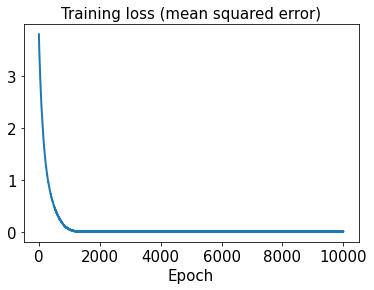

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

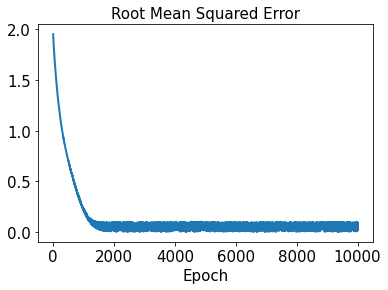

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 112ms/step - loss: 4.4538e-05 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.09950569460217301


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.0975262060887389


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.09423117665420745, 0.10913812410865499, 0.06420433729554083, 0.07979103663129655, 0.04241311599215013, 0.09322863064849625, 0.05854897861515425, 0.11762620076810769, 0.05039556669628709, 0.14581292005840157, 0.13660683627476933, 0.12391308626851215, 0.07480592097108522, 0.11495291767556269, 0.08527157824477208, 0.1240720486344456, 0.10140853942937339, 0.007925948683810306, 0.1229923001477452, 0.10927729813789763, 0.1650911028333868, 0.12113826297520287, 0.155525175303686, 0.0336672425701682, 0.12696917881652187, 0.08982363418747333, 0.023760903278444195, 0.029785210590703094, 0.007191525840947901, 0.10178200250843897, 0.06595651651384786, 0.08598977299444562, 0.1733312750343901]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.042746955790620565, 0.07347089142756141, 0.09569944231397112, 0.052910115941980064, 0.11847180407107681, 0.18325796584565984, 0.020157002561918814, 0.17851568791352404]


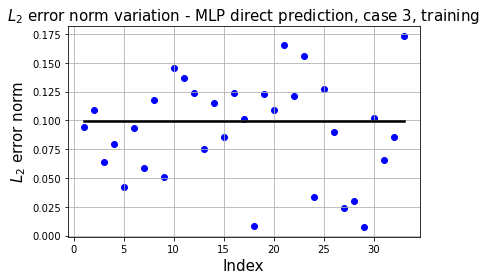

In [95]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

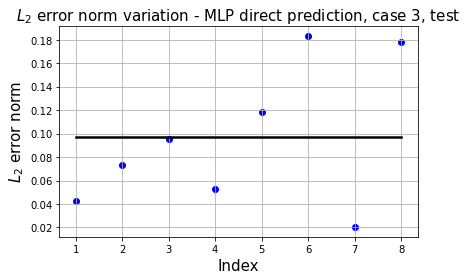

In [96]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

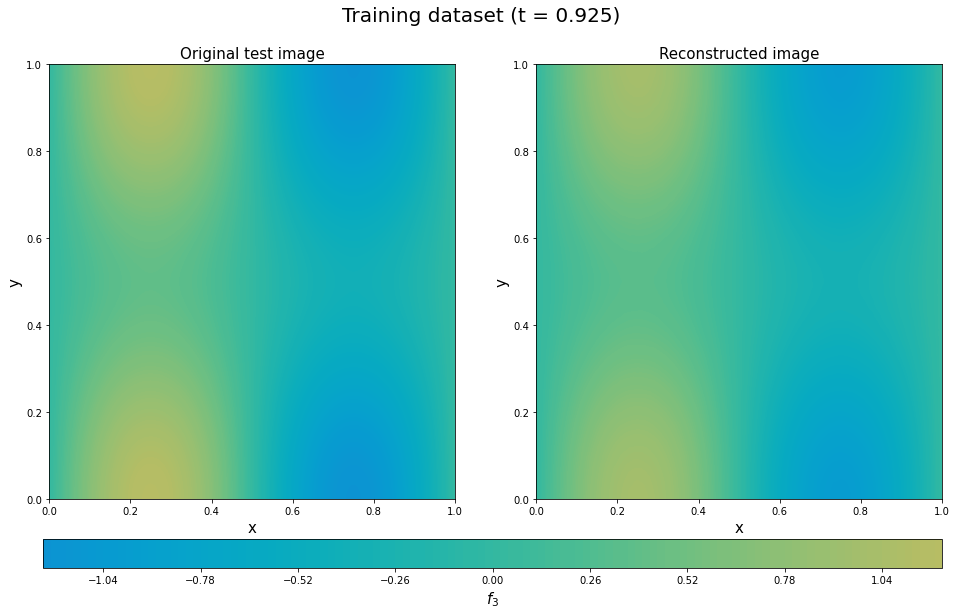

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

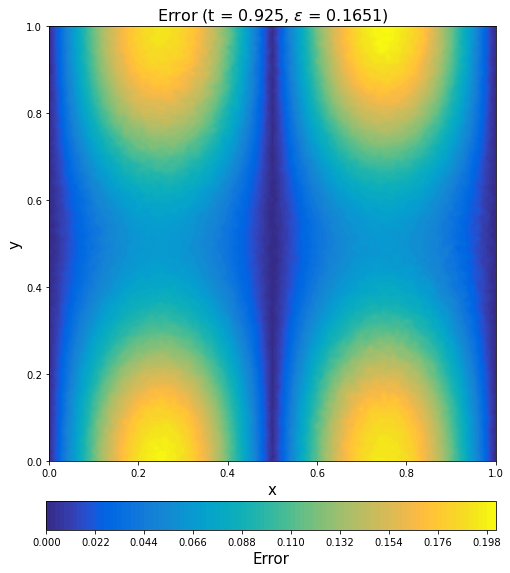

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

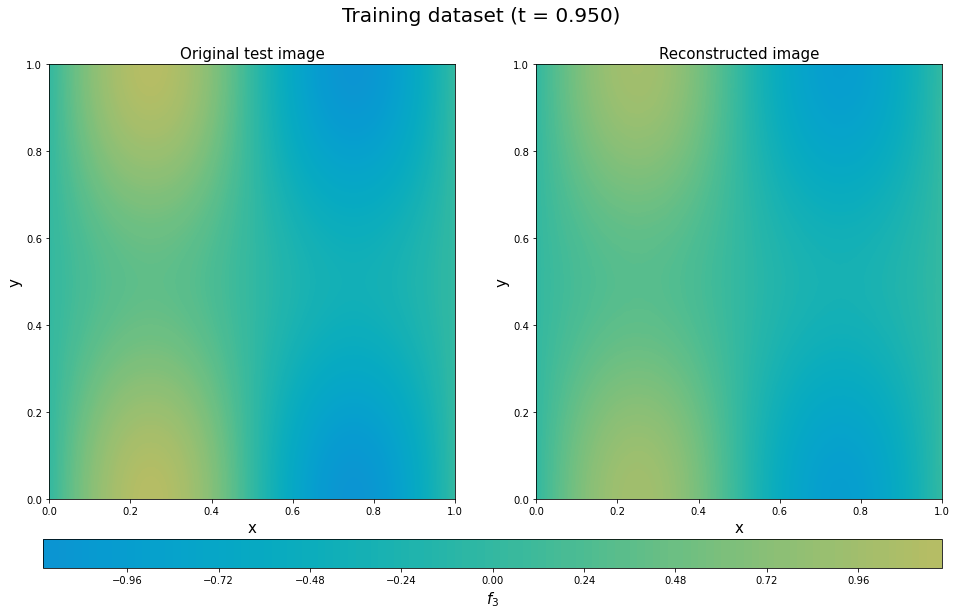

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

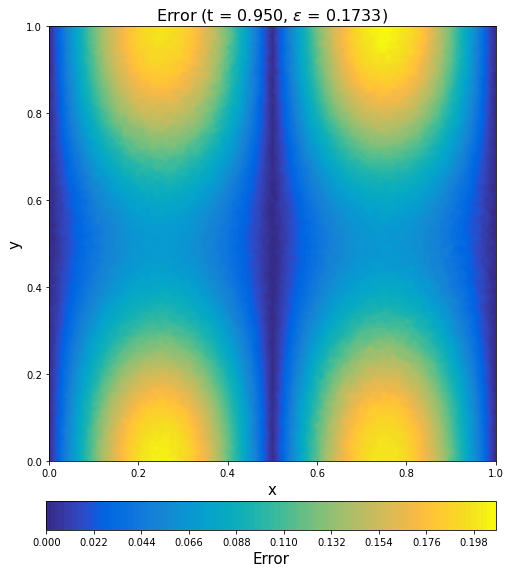

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

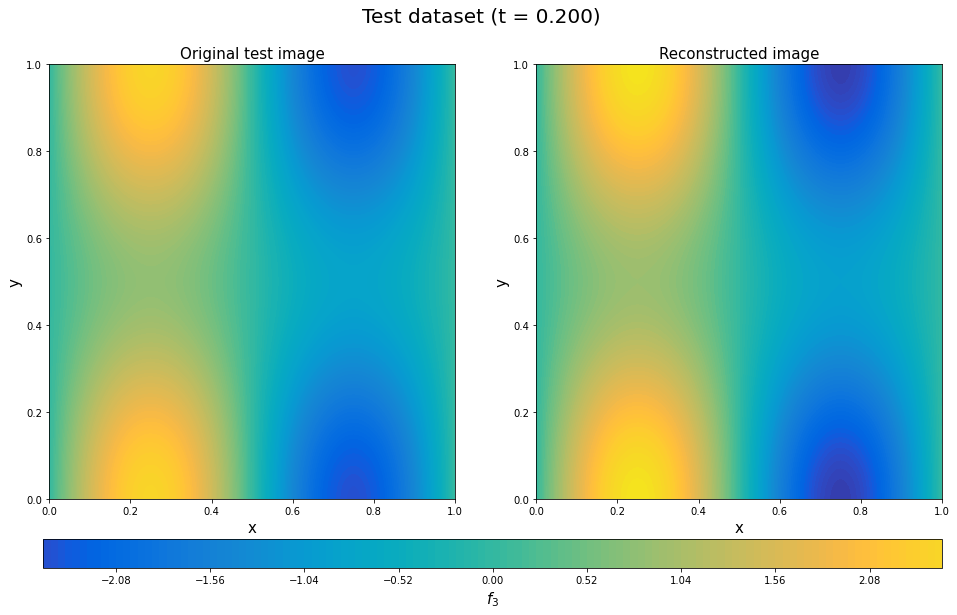

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

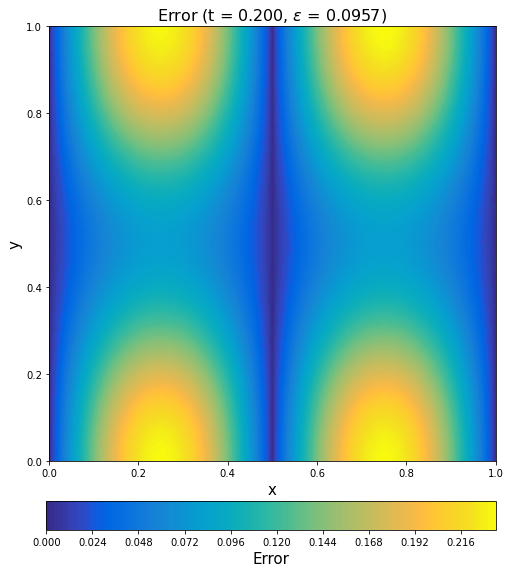

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

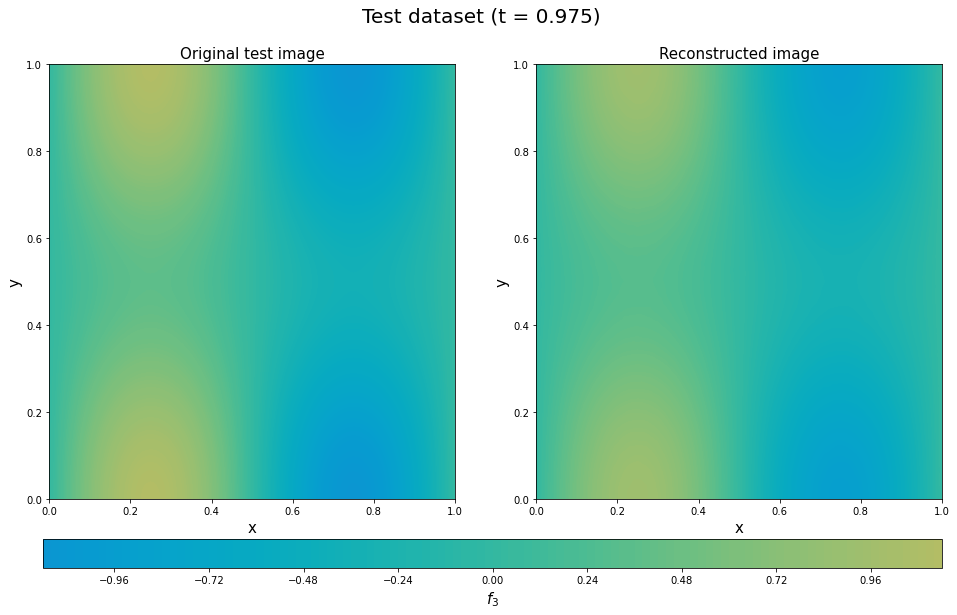

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

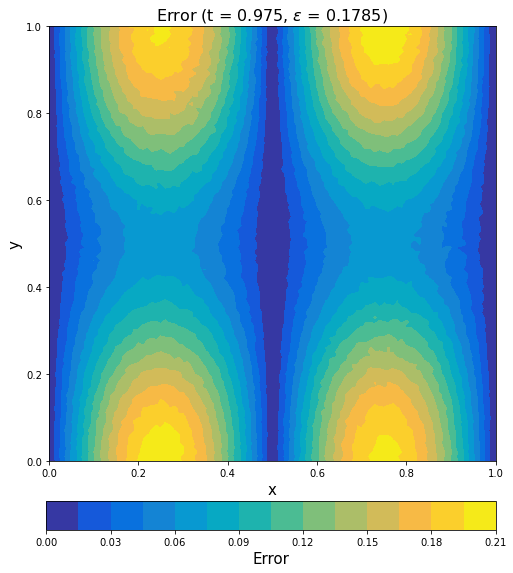

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()